<a href="https://colab.research.google.com/github/RobLudwig98/ReCell_Analysis/blob/main/SLF_Project_LearnerNotebook_LowCode(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning - Foundations Project: ReCell

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## **Please read the instructions carefully before starting the project.**

This is a commented Python Notebook file in which all the instructions and tasks to be performed are mentioned.

* Blanks '_______' are provided in the notebook that need to be filled with an appropriate code to get the correct result

* With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space

* Identify the task to be performed correctly and only then proceed to write the required code

* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code"

* Running incomplete code may throw an error

* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors

* Add the results/observations derived from the analysis in the presentation and submit the same in .pdf format

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 -q --user

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
# !pip install scikit-learn==1.2.2 seaborn==0.11.1 matplotlib==3.3.4 numpy==1.24.3 pandas==1.5.2 -q --user

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Loading the dataset

In [ ]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# loading data
data = pd.read_csv('/content/drive/MyDrive/UT/Supervised_Learning_Foundations/used_device_data.csv') ## Complete the code to read the data

## Data Overview

The initial steps to get an overview of any dataset is to:
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

### Displaying the first few rows of the dataset

This helps to quickly visualize and verify the data's structure, the presence of any anomalies, and get a feel for the data I'll be working with.

In [ ]:
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


### Checking the shape of the dataset

Understanding the size of the dataset in terms of rows and columns helps gauge the volume of data and plan resources accordingly.

In [ ]:
data.shape ## Complete the code to get the shape of data

(3454, 15)

### Checking the data types of the columns for the dataset

Knowing the data types is crucial for data preprocessing as it impacts how you handle each column during cleaning and analysis, such as converting data types or handling missing values.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

### Statistical summary of the dataset

Provides a quick summary of the numerical columns in your dataset. It includes count, mean, standard deviation, min, and max values, which help identify ranges and potential outliers.

In [ ]:
data.describe() ## Complete the code to print the statistical summary of the data

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
count,3454.000000,3275.000000,3452.000000,3450.000000,3450.000000,3448.000000,3447.000000,3454.000000,3454.000000,3454.000000,3454.000000
mean,13.713115,9.460208,6.554229,54.573099,4.036122,3133.402697,182.751871,2015.965258,674.869716,4.364712,5.233107
std,3.805280,4.815461,6.970372,84.972371,1.365105,1299.682844,88.413228,2.298455,248.580166,0.588914,0.683637
min,5.080000,0.080000,0.000000,0.010000,0.020000,500.000000,69.000000,2013.000000,91.000000,1.536867,2.901422
25%,12.700000,5.000000,2.000000,16.000000,4.000000,2100.000000,142.000000,2014.000000,533.500000,4.033931,4.790342
50%,12.830000,8.000000,5.000000,32.000000,4.000000,3000.000000,160.000000,2015.500000,690.500000,4.405133,5.245892
75%,15.340000,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,2018.000000,868.750000,4.755700,5.673718
max,30.710000,48.000000,32.000000,1024.000000,12.000000,9720.000000,855.000000,2020.000000,1094.000000,6.619433,7.847841


### Checking for duplicate values

Identifying duplicate rows is essential to ensure the quality of your dataset. Duplicates can skew your analysis and affect model performance.

In [ ]:
data.duplicated().sum() ## Complete the code to check duplicate entries in the data

0

### Checking for missing values

Missing data can significantly impact the results of my analysis and predictive model performance. Identifying missing values is crucial to decide how to handle them.

In [ ]:
data.isnull().sum() ## Complete the code to check duplicate entries in the data

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

Here’s a breakdown of what the missing values in your dataset signify:

    main_camera_mp: 179 missing entries. This is quite significant and suggests that for many devices, the main camera megapixel rating is not recorded. Depending on your analysis or model, you may need to impute these values, possibly based on similar devices, or examine why this data is missing.
    selfie_camera_mp: 2 missing entries. A small number that might be manageable through simple imputation methods like filling in with the median or mean of the column.
    int_memory, ram, weight: Each of these fields has a few missing values (4, 4, and 7 respectively). These could potentially be imputed without much bias.
    battery: 6 missing entries. Like the above, imputation could be a straightforward approach.

Handling Missing Values:

You have several strategies for dealing with missing data:

    Deletion: Remove rows with missing values if the number is small or if missing data signifies unusable records. This method is simple but can lead to significant data loss, especially with main_camera_mp.

    Imputation: Fill in missing values using various techniques:
        Mean/Median Imputation: Useful for numerical columns like ram, battery, weight, int_memory.
        Predictive Modeling: Use a machine learning algorithm to predict the missing values, particularly useful for columns with a large number of missing values like main_camera_mp.
        K-Nearest Neighbors (KNN): Impute values based on the similarity to other items.

    Using Indicators: For columns with significant missing data, you could add a binary indicator column to flag data as missing, which can sometimes be informative for models.

Imputation Plan

main_camera_mp: Use the median value of 8.0 megapixels for imputation.

Other fields (selfie_camera_mp, int_memory, ram, battery, weight): Also use median values for imputation as they have very few missing values.

7. Creating a Copy of the Data

Creating a copy of the dataset ensures that I have an original unmodified dataset intact in case I need to revert changes or compare transformations.

## Exploratory Data Analysis

### Univariate Analysis

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

The provided Python function histogram_boxplot is designed to visualize the distribution of a single numerical feature in a dataset by displaying both a histogram and a boxplot on the same scale. This type of visualization is particularly useful in univariate analysis because it allows you to see both the spread and the central tendency of the data at a glance. Here's a breakdown of what the function does and why each component is important:
Function Overview

    Function Definition: histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None)

Parameters:

    data: The DataFrame containing the data.
    feature: The column name of the feature to be plotted.
    figsize: Tuple specifying the width and height of the figure in inches.
    kde: A Boolean that determines whether to plot a kernel density estimate (KDE) on the histogram.
    bins: The number of bins to use for the histogram. If not specified, a default number is calculated based on the data.

Function Components:

    Creating Subplots:
        The function initializes a figure f2 and a set of subplots (ax_box2, ax_hist2) using plt.subplots.
        It uses two rows (nrows=2) with shared x-axes (sharex=True), which allows the boxplot and histogram to align vertically and share the same range of feature values.
        gridspec_kw={"height_ratios": (0.25, 0.75)} adjusts the height ratio of the boxplot to histogram, making the histogram three times as tall as the boxplot for clearer visualization.

    Boxplot:
        sns.boxplot is used to create the boxplot. This plot provides a summary of the data distribution, showing the median (central line inside the box), interquartile range (IQR; the box), and potential outliers (points outside the whiskers).
        showmeans=True adds a mean marker to the boxplot, usually represented by a triangle, giving a visual representation of the mean value.

    Histogram:
        sns.histplot plots the histogram, which shows the distribution of the data by forming bins of the feature's values and counting the number of observations in each bin.
        The kde parameter, when set to True, adds a Kernel Density Estimate on top of the histogram, which estimates the probability density function of the variable.
        The bins parameter allows customization of how detailed the histogram is; more bins can give more detailed granularity, while fewer bins simplify the view.

    Adding Mean and Median Lines:
        Lines representing the mean (ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")) and median (ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")) are drawn on the histogram. These lines provide a clear reference to the central location of the data values, helping to visualize how data points are spread around the mean and median.

Why Use This Function?

This function is extremely useful in exploratory data analysis (EDA) for understanding the underlying characteristics of a distribution:

    Identify Skewness: Visual comparison of mean and median lines can indicate skewness in the distribution.
    Spot Outliers: The boxplot component highlights outliers, which are important to identify as they can influence statistical analyses and model performance.
    Understand Dispersion and Tendencies: Provides insights into the variability and central tendencies of the data, essential for informing data preprocessing decisions like scaling, transformation, or outlier handling.

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

The provided Python function labeled_barplot is designed to create bar plots for categorical data and can optionally display annotations for the count or percentage of each category. This type of visualization is key in univariate analysis for categorical variables, as it allows you to see the frequency distribution of different categories within a dataset. Here's what the function does and why it's useful:
Function Overview

    Function Definition: labeled_barplot(data, feature, perc=False, n=None)

Parameters:

    data: The DataFrame containing the data.
    feature: The column name of the categorical feature to be visualized.
    perc: A Boolean flag that determines whether to display percentages or raw counts on the bars.
    n: An optional parameter that specifies the number of top categories to display. This is useful when the feature has many unique categories and you want to focus on the most frequent ones.

Function Components:

    Figure Setup:
        The function initializes a figure whose width is dynamically adjusted based on the number of unique categories in the feature (count) or a specified number (n).
        It ensures there's enough space to prevent the x-axis labels from overlapping, especially useful when there are many categories.

    Bar Plot Creation:
        sns.countplot is used to create the bar plot. This function automatically counts the occurrences of each category and displays them as bars.
        The order parameter of sns.countplot is set to display categories based on their frequency (value_counts()), ensuring the bars are ordered from most to least frequent.

    Annotations:
        The loop for p in ax.patches: iterates over each bar in the plot to add annotations.
        If perc is True, the function calculates the percentage of each category as a proportion of the total and annotates this percentage above the corresponding bar.
        If perc is False, the function annotates the raw count above each bar.
        The annotate function positions the text above each bar at the center (ha='center', va='center'), making the labels clear and easy to read.

    Presentation:
        plt.xticks(rotation=90, fontsize=15) rotates the x-axis labels to prevent them from overlapping, which is particularly useful for categorical data with long or numerous labels.
        plt.show() displays the plot.

Why Use This Function?

    Frequency Analysis: Quickly determine the most and least common categories in a dataset.
    Data Quality Checks: Identify issues like unexpected categories or imbalance in category frequencies.
    Informative Visuals: Adding percentages or counts directly on the plot makes it self-explanatory, enhancing readability and providing immediate insights without needing to refer back to the data.

**`normalized_used_price`**

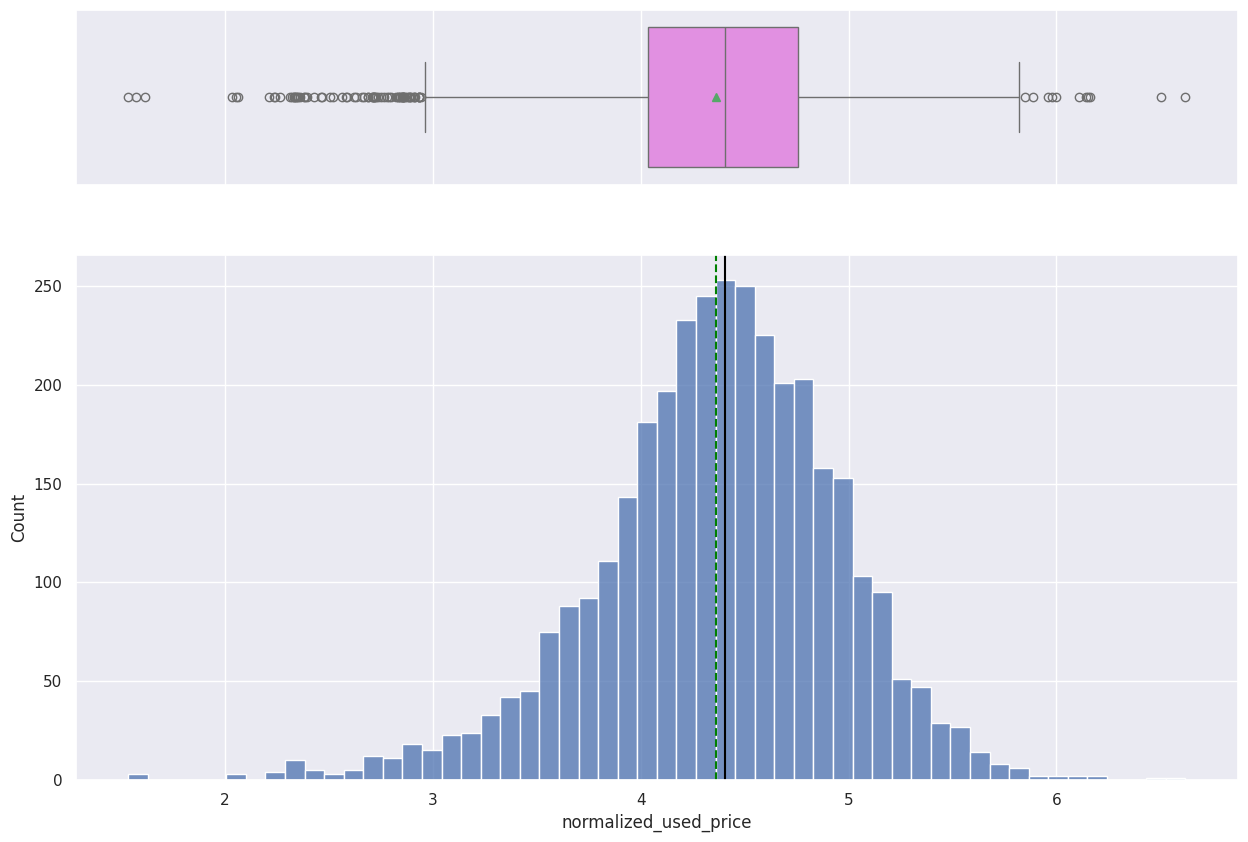

In [ ]:
histogram_boxplot(df, "normalized_used_price")

Purpose: Visualizes the distribution and outliers of the normalized prices for new devices. This helps understand pricing strategies and variance in new device prices.

Central Tendency and Distribution

Normal Distribution: The near-normal distribution of prices suggests that most of the used devices have prices clustering around the mean, which is common in markets with a high volume of transactions and a variety of product conditions.

Mean and Median Closeness: The closeness of the mean and median indicates minimal skew in the data, implying that there are no extreme biases toward higher or lower-end prices in the bulk of the data.

Market Stability and Pricing Strategy

Stable Market: The distribution suggests a stable used device market with predictable pricing, which is advantageous when developing a pricing model. A stable and predictable market allows for more accurate price predictions and fewer surprises.

Strategic Pricing: Understanding this distribution helps in identifying standard pricing levels and can guide setting competitive prices. This analysis can help ReCell strategically position their products in the market to maximize sales and profits.

Outliers and Anomalies

Outliers: The presence of outliers as shown in the boxplot indicates prices that are significantly different from the majority. These outliers might represent special cases in the dataset, such as nearly new high-end devices or very old and worn-out ones.

Implications of Outliers: Outliers warrant further investigation to determine if they are due to data errors, unique features of the devices, or if they represent genuine market anomalies. Understanding why these outliers exist can help refine pricing strategies, perhaps by categorizing products based on their likelihood to be outliers.

Implications for the Linear Regression Model

Feature Influence: This plot underscores the need to explore which features most significantly influence these prices. Factors like brand, device condition, specifications, and release year might explain the spread and the outliers.

Model Accuracy: For your linear regression model, the relatively normal distribution of prices implies that you might achieve good predictive performance, as linear regression models perform well with data that approximate normality.

**`normalized_new_price`**

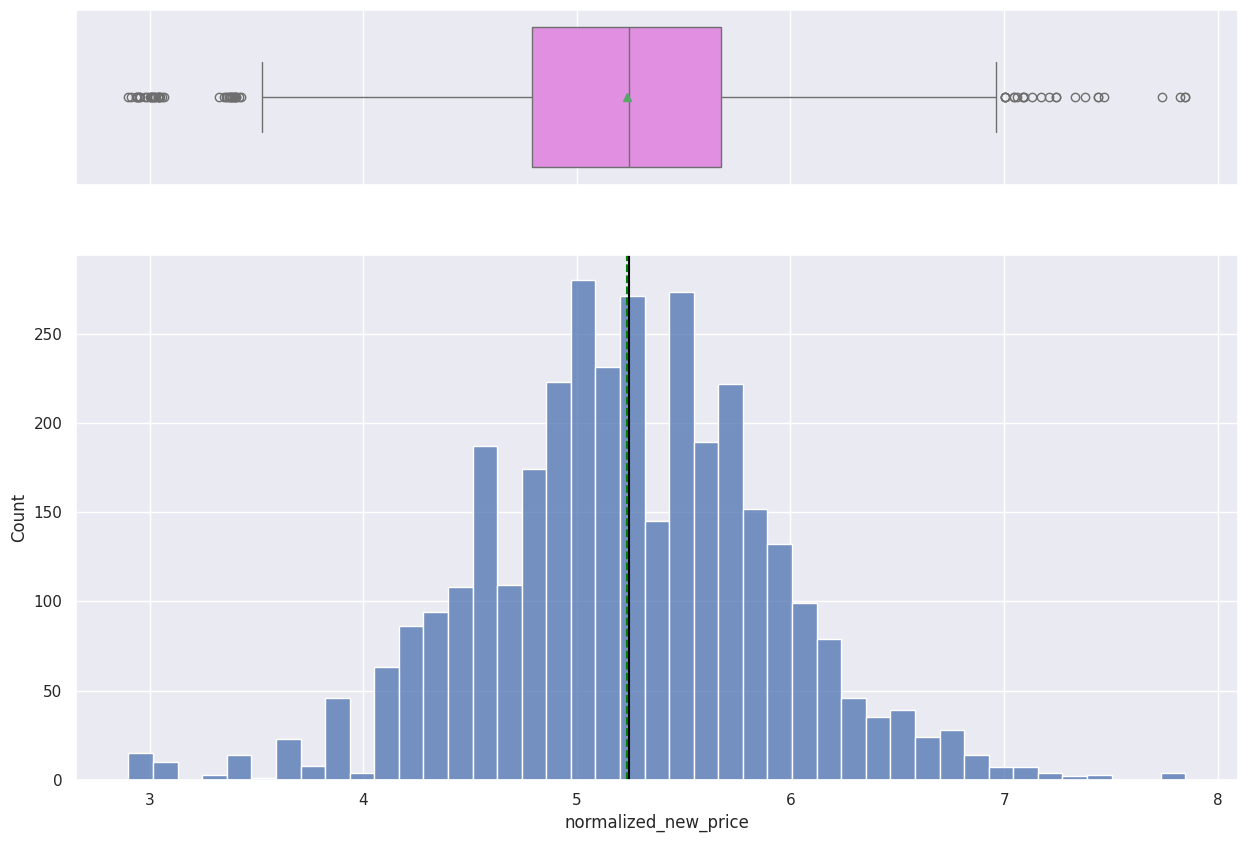

In [ ]:
histogram_boxplot(df, 'normalized_new_price')  ## Complete the code to create histogram_boxplot for 'normalized_new_price'


Purpose: Visualizes the distribution and outliers of the normalized prices for new devices. This helps understand pricing strategies and variance in new device prices.

Histogram

Shape: The histogram shows a skewed distribution, leaning more heavily towards the right. This indicates that while many new devices are priced in the middle range, there's a significant number of higher-priced models as well.

Central Tendency: The mean (dotted line) is pulled towards the higher price values, which is typical in right-skewed distributions. The median (solid line) is lower than the mean, indicating that more than half of the new device prices are below the mean.

Boxplot

Quartiles: The box (representing the interquartile range, IQR) shows where the middle 50% of data lies, with more data compressed at the lower end of the price range.

Outliers: There are several outliers on the higher end, indicating some new devices are priced significantly higher than the typical range. These could represent premium models.

Interpretation in Relation to Your Project

Price Range Insight: This distribution provides a clear view of how new devices are priced, with a significant range from moderate to very high prices. This can inform how ReCell might price their refurbished versions competitively.

Pricing Strategy: Knowing the skew towards higher prices in new devices can help ReCell to strategically price their used and refurbished devices. They might choose to focus on offering competitive prices in the mid-range where most new device prices cluster, or possibly target the lower end to attract cost-conscious consumers.

Market Positioning: The outliers and the high-end skew suggest there's a segment of the market that values premium devices. ReCell could consider how they might cater to this segment with high-quality refurbishments.

Implications for Linear Regression Model

Feature Importance: It would be beneficial to analyze how the features of these higher-priced new devices (like advanced technology, brand prestige, etc.) might be used to predict used prices in your regression model. Understanding what drives new prices up can help in predicting used prices more accurately.

Outlier Analysis: Consider whether to include or exclude outliers in your predictive modeling. They could either introduce noise or provide valuable insights into premium pricing dynamics.

This plot indicates a wider range in pricing strategy for new devices compared to used ones, suggesting different factors or a broader market segmentation at play, which should be considered when developing your pricing model.








**`screen_size`**

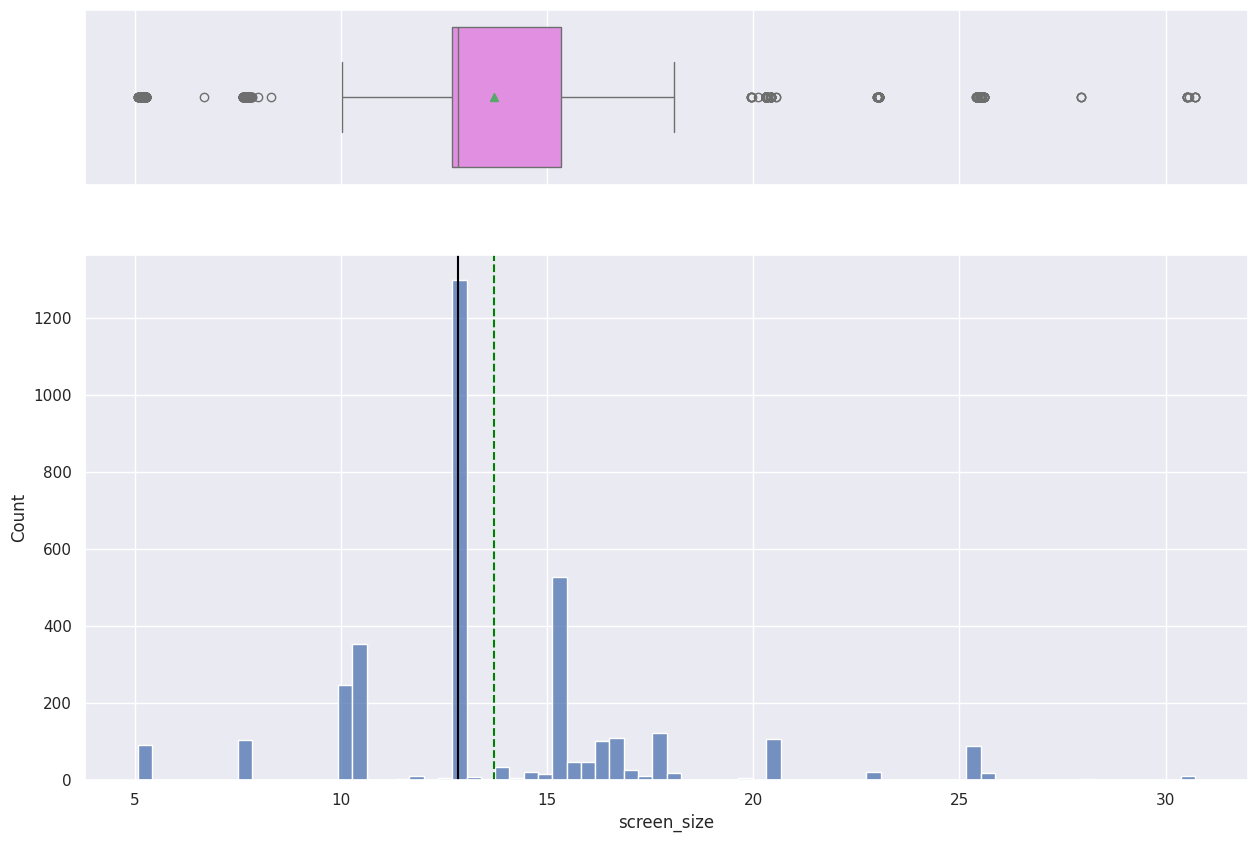

In [ ]:
histogram_boxplot(df, 'screen_size')  ## Complete the code to create histogram_boxplot for 'screen_size'

Purpose: Examines the range and distribution of screen sizes across devices. Screen size is a key feature that may influence consumer choice and device usability.

Histogram

Central Concentration: There is a sharp peak around 15 cm, indicating that a significant portion of devices falls within this screen size category. This suggests it's a popular choice among consumers.

Secondary Peaks: Additional smaller peaks around 10 cm and slightly above 20 cm suggest there are also market segments that prefer either smaller or larger devices. This variation in preference can indicate different use cases or consumer demographics preferring different screen sizes.

Boxplot

Range and IQR: The boxplot component shows that the interquartile range is quite narrow, centered around the main peak of the histogram, indicating that most of the devices have screen sizes close to 15 cm.

Outliers: There are outliers on both the smaller and larger ends of the screen size spectrum. These could represent unusually small devices, like certain types of mobile phones, or unusually large devices, like tablets.

Interpretation in Relation to Your Project

Consumer Preference: The concentration around the 15 cm screen size indicates a standard preference which could be a significant factor in pricing used devices. Devices with screen sizes close to this norm might sell better or command higher prices.

Market Segmentation: The presence of secondary peaks suggests there are niche markets within the device space that prefer notably smaller or larger screens. This could be leveraged in targeted marketing or stocking decisions for ReCell.

Feature Importance for Pricing Model: The variance in screen size and its apparent impact on consumer choice imply that this attribute should be considered in your predictive pricing model. It could be used as a feature to help predict the price of a device, as larger or smaller than average screens might affect a device’s desirability and therefore its price.

Design and Usability Impact: Screen size affects the usability of a device and is likely a significant determinant of consumer choice, impacting how devices are used (e.g., for entertainment vs. practical purposes). Understanding this can help tailor the sales approach.

This plot underlines the importance of considering screen size in your dynamic pricing strategy, as it clearly influences consumer preferences and could significantly impact the resale value of devices.

**`main_camera_mp`**

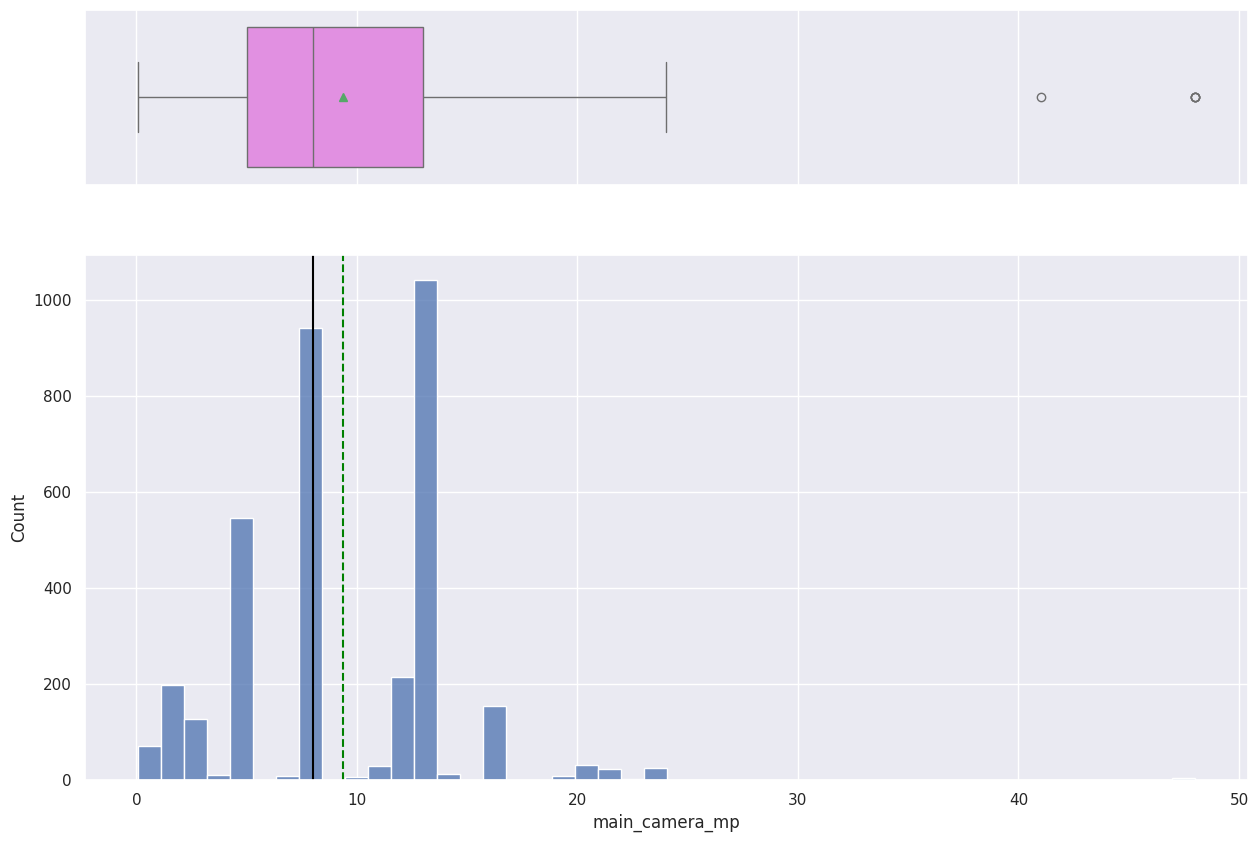

In [ ]:
histogram_boxplot(df, 'main_camera_mp')  ## Complete the code to create histogram_boxplot for 'main_camera_mp'

Purpose: Analyzes the distribution of camera quality across devices, which is crucial for understanding trends in device camera capabilities.

Histogram

Multiple Peaks: The histogram displays multiple peaks, particularly noticeable around 8 megapixels and 13 megapixels, suggesting that these are common camera specifications in the market.

Wide Range: The data spans a wide range from low-end camera qualities (around 2 megapixels) to high-end specifications (up to 48 megapixels). This spread indicates a diverse range of devices from basic to high-end camera capabilities.

Boxplot

Median and Quartiles: The median (solid line) is positioned near 13 megapixels, suggesting that half of the devices have a camera resolution of 13 megapixels or less. The interquartile range is relatively narrow, indicating that most devices cluster around the median value.

Outliers: There are several outliers on the higher end, particularly beyond 20 megapixels. These outliers likely represent high-end smartphones with advanced camera technologies.

Interpretation in Relation to Your Project

Consumer Trends: The presence of multiple peaks and a broad range suggests varying consumer preferences, with significant groups opting for both mid-range and high-end camera specifications. This variability is important for pricing used devices, as higher camera resolutions can be a significant selling point.

Impact on Pricing Strategy: Devices with cameras at or above the median (13 megapixels) may command higher prices in the used market, especially those in the outlier range which feature high-end camera technology.

Feature Importance for Pricing Model: Camera resolution should be considered a significant predictor in your pricing model. Devices with higher-resolution cameras might be valued higher, reflecting current trends where camera quality is a major factor in consumer purchasing decisions.

Marketing Insights: Understanding these trends can also assist ReCell in marketing strategies, highlighting camera quality in their promotions, especially for devices that fall into the higher megapixel ranges which can attract photography enthusiasts or tech-savvy consumers.

This plot helps underline the importance of including camera resolution as a feature in your dynamic pricing model and can guide strategic decisions about which device features to emphasize in ReCell's marketing and sales strategies.

**`selfie_camera_mp`**

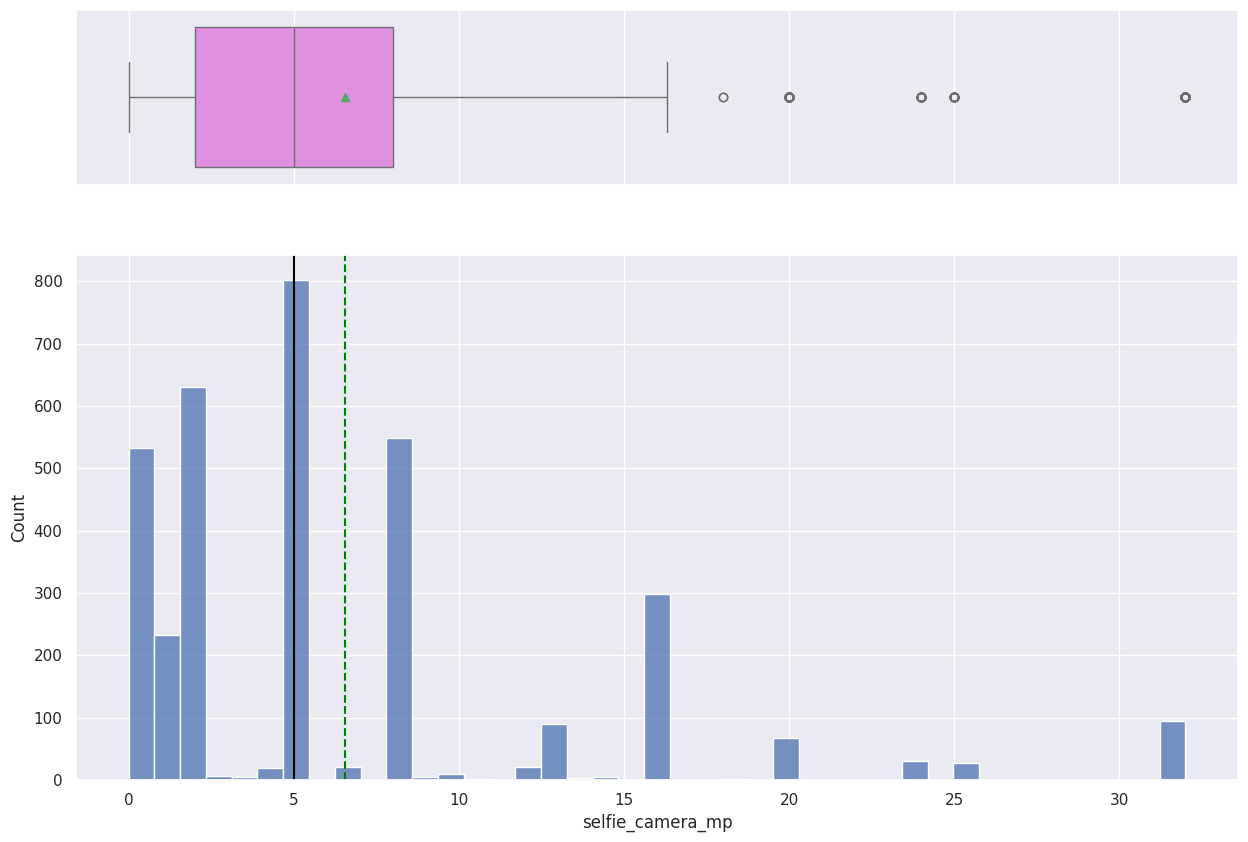

In [ ]:
histogram_boxplot(df, 'selfie_camera_mp')  ## Complete the code to create histogram_boxplot for 'selfie_camera_mp'

Purpose: Provides insights into the quality and variation of front-facing cameras, important for markets focused on video communication and selfies.

This plot is particularly important given the growing emphasis on front-facing cameras for selfies and video communications. Here’s what this plot tells us:

Histogram

Peaks and Distribution: The histogram shows clear peaks around 5, 8, and 16 megapixels, indicating these are common specifications for front-facing cameras in devices. The data seems to be multimodal, with significant preferences for certain megapixel counts.

Range of Specifications: The range extends from low (2 megapixels) to higher-end (up to 30 megapixels), though very high resolutions (over 20 megapixels) are less common. This suggests that while there is demand for high-quality selfie cameras, the most popular devices fall within the mid-range category.

Boxplot

Median and IQR: The median is around 8 megapixels, and the interquartile range is not very wide, indicating that a majority of the devices have front camera qualities clustered around this median.

Outliers: There are outliers particularly at the higher end, indicating some devices feature unusually high-resolution front cameras. These could represent premium devices.

Interpretation in Relation to Your Project

Consumer Trends: The popularity of the 5, 8, and 16-megapixel cameras suggests these are the most accepted and expected specs for front-facing cameras. These specs likely meet the needs of the average consumer for tasks like video calling and selfies.

Impact on Pricing Strategy: The presence of clear peaks in camera quality suggests that devices with front cameras around these popular specifications may be easier to price and sell, as they meet a standard consumer expectation. High-end outliers might be priced higher due to their premium camera specs.

Feature Importance for Pricing Model: Given the variance in selfie camera specs and their importance to consumers, this should be considered as a significant feature in your predictive pricing model. Devices with higher-spec front cameras, especially those in the outlier range, might attract a premium.

Market Segmentation and Marketing Strategy: This analysis can inform targeted marketing strategies, especially for devices that cater to younger consumers or those highly engaged in social media, who might value higher-quality selfie cameras.

This plot underlines the importance of the front-facing camera’s megapixels in consumer devices, suggesting that while there is a consistent market for mid-range specs, there is also a niche market for high-end specs that could be strategically targeted.

**`int_memory`**

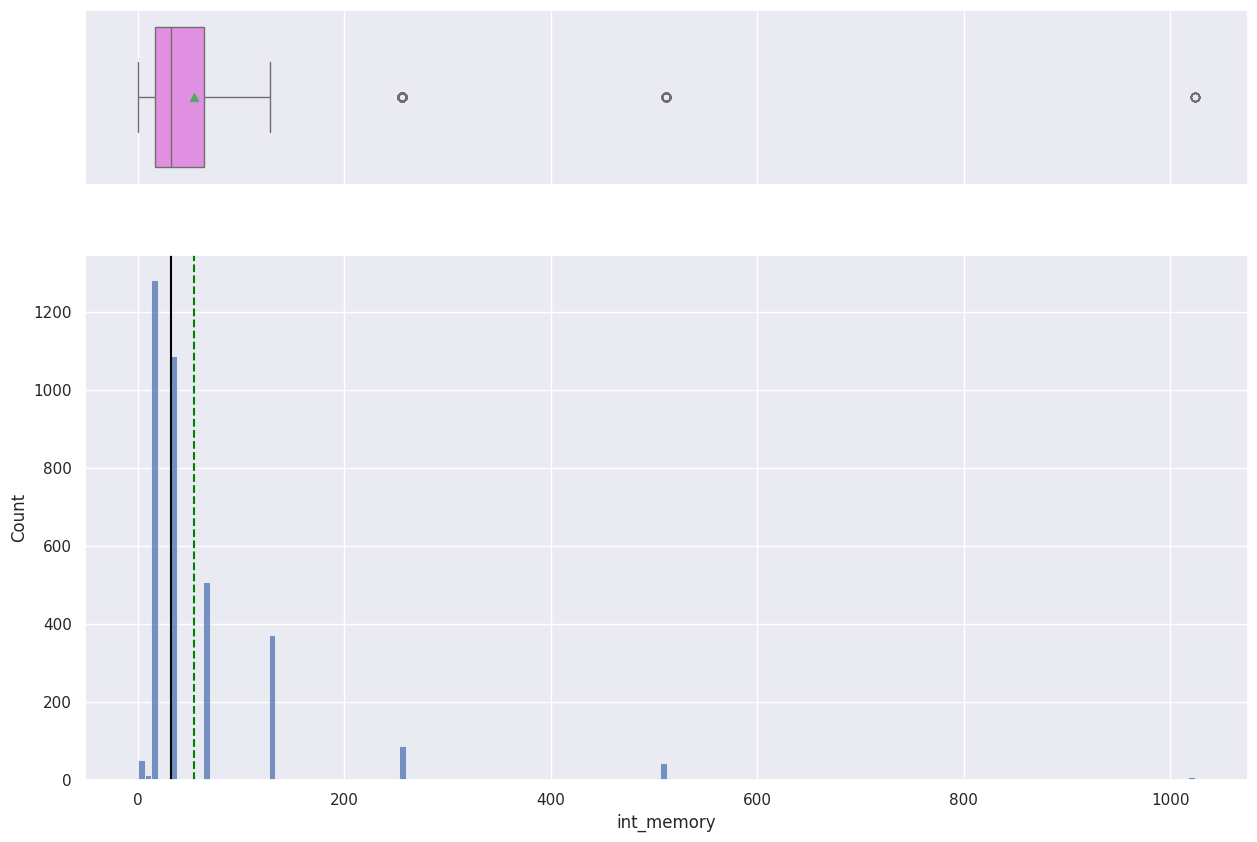

In [ ]:
histogram_boxplot(df, 'int_memory')  ## Complete the code to create histogram_boxplot for 'int_memory'

Purpose: Looks at the distribution of internal storage options across devices. This feature is significant as it affects the device's functionality and user experience.

The histogram and boxplot for int_memory (internal memory in GB) displayed in your plot provide insights into the distribution and variability of storage options available across devices in your dataset. Here's how you can interpret this plot:

Histogram

Concentration at Low Values: The histogram shows a strong concentration of devices with lower internal memory capacities, particularly around 32GB and 64GB, as evidenced by the tall bars at these points. This indicates that these storage sizes are very common in the device dataset.

Long Tail: The histogram exhibits a long tail towards higher memory capacities, extending up to 1000GB. This tail is less dense, indicating fewer devices with very high storage capacities, but it shows that such options are available.

Boxplot

Median and IQR: The median (solid green line) of internal memory is near 64GB, which aligns with modern smartphone storage expectations. The interquartile range is narrow, primarily centered around the most common storage capacities.

Outliers: The boxplot reveals outliers at the high end of the memory range, particularly devices with storage capacities significantly greater than the upper quartile. These may represent premium devices with high storage capacity.

Interpretation in Relation to Your Project

Consumer Preferences: The concentration around 32GB and 64GB suggests these are standard and popular choices among consumers, likely balancing cost and functionality. These storage sizes might be sufficient for average users, influencing their prevalence in the market.

Pricing Implications: Devices with standard memory capacities (32GB and 64GB) likely face more competition in pricing, possibly leading to lower price points due to their commonality. Conversely, devices with unusually high memory (as marked by outliers) may attract premium pricing, especially if they cater to power users or specific professional needs.

Feature Importance for Pricing Model: Internal memory should be a key feature in your predictive pricing model, as it significantly affects a device's functionality and desirability. The variance in memory capacity could influence how different models are priced within the used device market.

Strategic Stocking and Marketing: Knowing the most common and outlier memory capacities can help ReCell in strategic stocking decisions and marketing. Emphasizing the availability of both common and high-end storage options might attract a broader range of consumers.

This plot underlines the importance of internal memory as a feature that significantly impacts device functionality and user experience, and it should be effectively utilized in your pricing model and marketing strategies.

**`ram`**

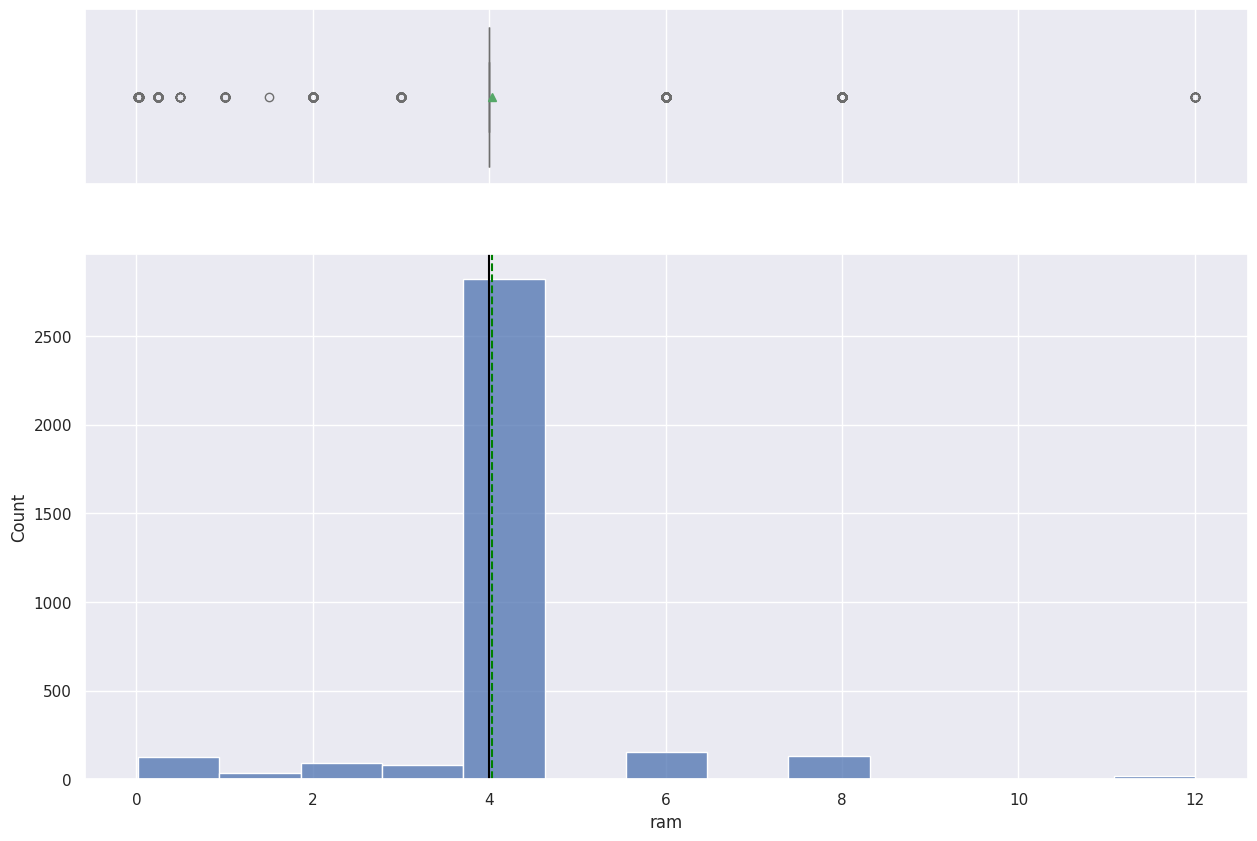

In [ ]:
histogram_boxplot(df, 'ram')  ## Complete the code to create histogram_boxplot for 'ram'

Purpose: This code plots both a histogram and a boxplot for the RAM capacity of devices. The histogram displays the distribution of RAM values, showing how frequently each RAM size occurs, which can help identify the most common RAM sizes. The boxplot highlights the median, quartiles, and potential outliers in RAM sizes, providing insight into the central tendency and spread of the data.

The histogram and boxplot for ram (Random Access Memory in GB) in your dataset provide insights into the distribution of RAM capacities across devices. Here's an interpretation of what this plot tells us:

Histogram

Dominant Peak: The histogram shows a very dominant peak around 4 GB of RAM, indicating that this is the most common RAM size among the devices in your dataset. This peak is significantly higher than any other, suggesting a standardization around this memory capacity in the market.

Limited Variability: Beyond 4 GB, the counts of devices with higher RAM capacities drop sharply. There are very few devices with RAM capacities of 6 GB or higher, indicating that such configurations are less common.

Boxplot

Median and IQR: The median (solid green line) is at or near 4 GB, aligning with the histogram's peak. The interquartile range is very narrow, indicating that most of the RAM values are concentrated around this median value.

Outliers: The boxplot identifies several outliers with higher RAM values. These points represent devices with RAM capacities much higher than typical, which may be targeted towards specific, more demanding uses or user segments.

Interpretation in Relation to Your Project

Consumer Preference and Market Trends: The heavy concentration around 4 GB of RAM suggests that this is a standard and widely accepted configuration, likely sufficient for the average consumer's needs. Devices with this RAM size likely represent a significant portion of the market and may face intense pricing competition.

Pricing Implications: Given the concentration around 4 GB, devices with this amount of RAM might be expected to have lower price variability and could be priced competitively. Devices with higher RAM capacities, while less common, might command a premium due to their rarity and potential for more advanced usage.

Feature Importance for Pricing Model: RAM should be a significant predictor in your pricing model, as variations in RAM can significantly influence device performance and, consequently, user preference and pricing.

Strategic Stocking and Marketing: Knowledge of the most common and outlier RAM capacities can assist ReCell in strategic stocking decisions. Promoting higher RAM devices could appeal to power users or tech enthusiasts looking for more robust performance.

This plot highlights the importance of RAM as a key feature affecting both device performance and market value, which should be carefully considered in your dynamic pricing model and marketing strategies.

**`weight`**

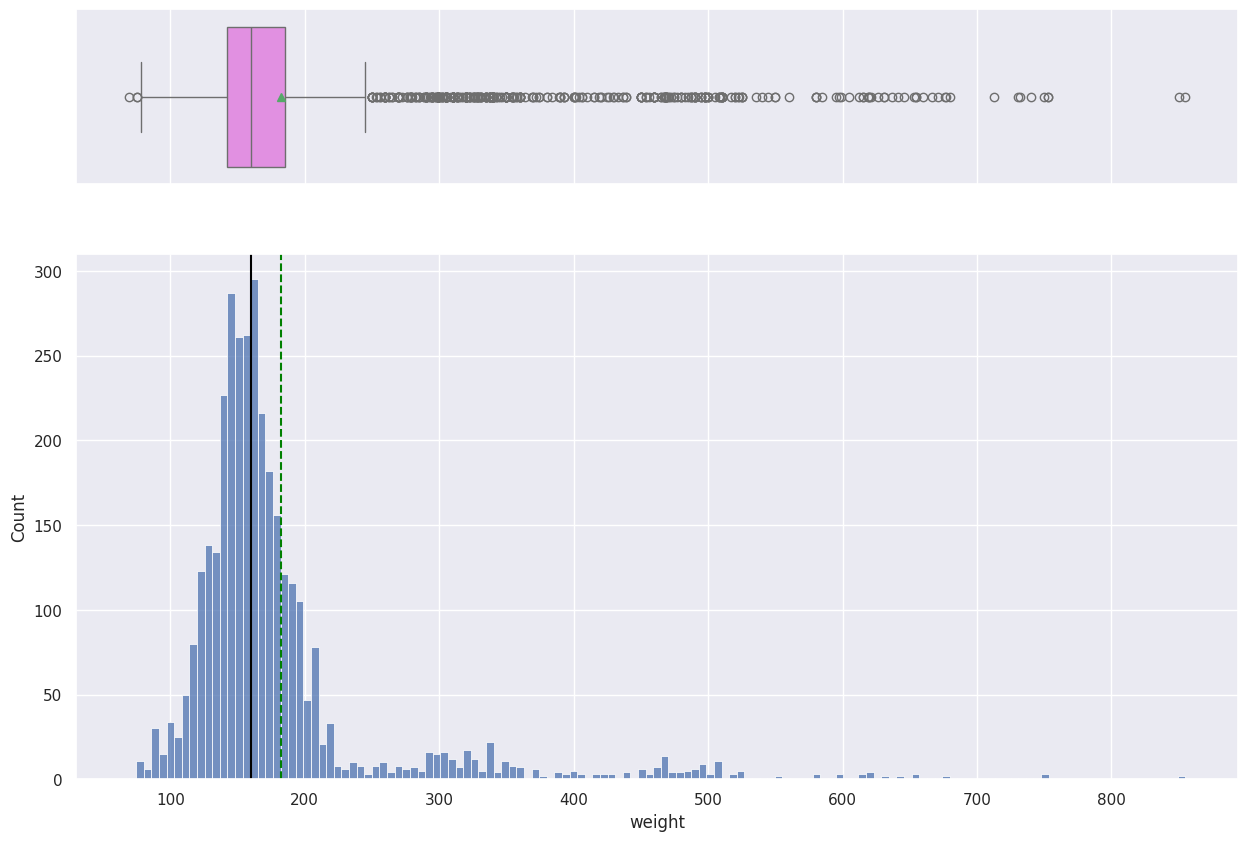

In [ ]:
histogram_boxplot(df, 'weight')  ## Complete the code to create histogram_boxplot for 'weight'

Purpose: This visualization will give you an understanding of the distribution and variability of the device weights. The boxplot component is particularly useful for spotting outliers and understanding how the weights vary around the median.


The histogram and boxplot for weight of devices in your dataset provide valuable insights into the distribution of device weights and how they vary. Let’s analyze what this plot tells us:

Histogram

Central Concentration: The histogram shows a pronounced peak around 150 to 200 grams, indicating that a significant majority of devices fall within this weight range. This suggests that this weight range is standard for most consumer devices, likely reflecting user preferences for portability and ease of use.

Tail Distribution: Beyond the central peak, the histogram shows a tail extending towards heavier weights, though with much lower frequency. This represents heavier devices, possibly larger tablets or devices with additional features like larger batteries or more robust casing.

Boxplot

Median and IQR: The median weight (solid green line) is positioned near the peak of the histogram, and the interquartile range is relatively tight, suggesting that half of the devices are closely clustered around this median weight.

Outliers: There are several outliers on the higher end, indicating that there are some devices significantly heavier than the typical range. These could be special-purpose devices or those with larger screens and additional features.

Interpretation in Relation to Your Project

Consumer Preferences: The clustering around a central weight suggests a preference in the market for devices that are not too heavy, enhancing portability and ease of use, which are important factors for consumer satisfaction.

Pricing Implications: The standard range of weights might not significantly influence the price unless a device is notably lighter or heavier. Heavier outliers might be specialty devices that could command a premium price due to their unique features or larger size.

Feature Importance for Pricing Model: While weight may not be as critical a feature as internal memory or camera quality, it could still play a role in pricing, particularly for outlier devices. It might be worth exploring how much weight influences consumer choice and pricing in specific segments like tablets versus smartphones.

Marketing and Stock Decisions: Understanding weight distribution can help ReCell in marketing, emphasizing the portability of lighter devices or the enhanced features of heavier devices. This could also guide inventory decisions, focusing on stocking products that align with consumer weight preferences.

This plot essentially helps in understanding how device weight could influence consumer preferences and, consequently, how it should be factored into pricing strategies and marketing efforts.

**`battery`**

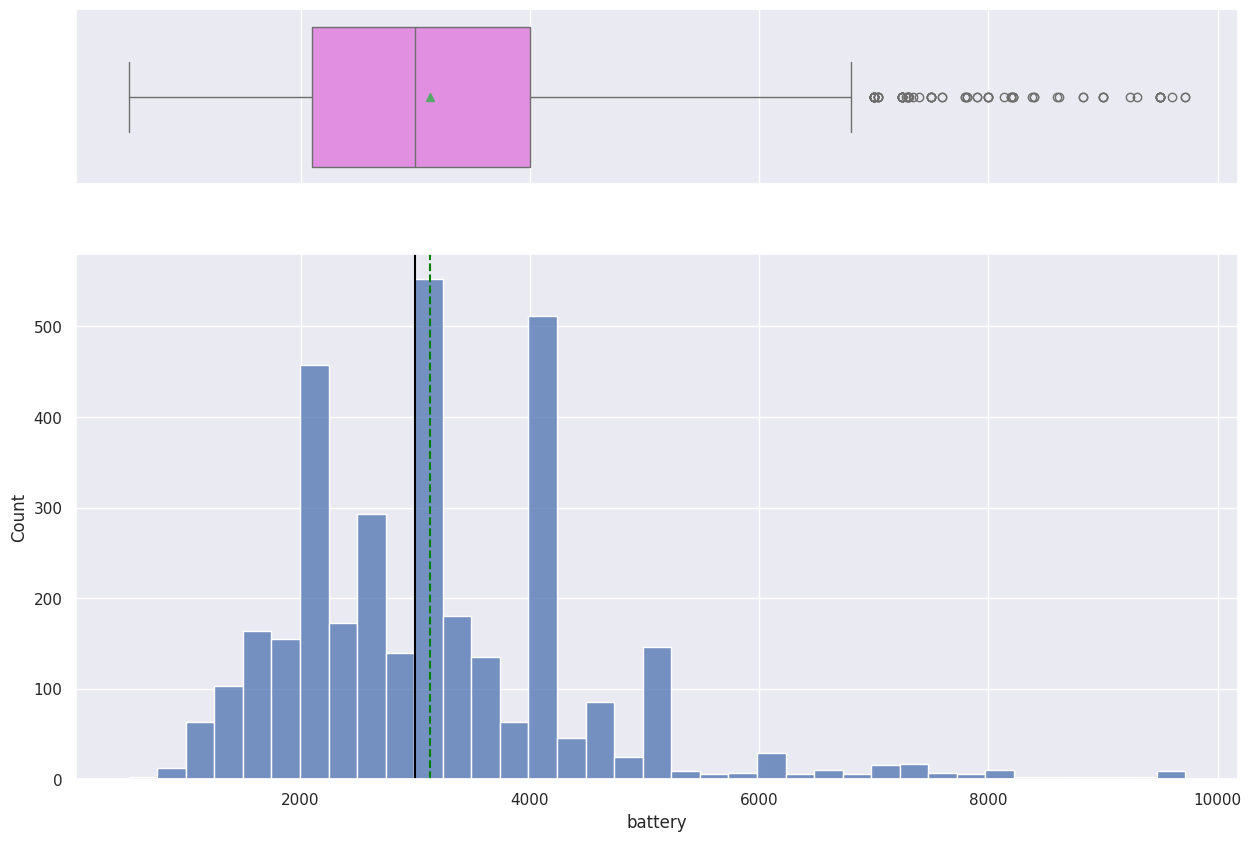

In [ ]:
histogram_boxplot(df, 'battery')  ## Complete the code to create histogram_boxplot for 'battery'

Purpose: Analyzing the battery capacity can reveal insights into the endurance or usage life of devices. The histogram shows the common battery capacities, while the boxplot provides a quick look at the range and outliers, which are crucial for quality assessments.


The histogram and boxplot for the battery capacity (in mAh) of devices in your dataset reveal how battery capacities are distributed among the devices. This information is crucial since battery life is a significant factor in consumer electronics. Here's a breakdown of what the plot indicates:

Histogram

Distribution Shape: The histogram shows a multi-modal distribution with several peaks, suggesting that certain battery capacities are more common than others. The prominent peaks occur around the 3000 mAh and 5000 mAh marks, which are typical for modern smartphones.

Range of Capacities: The data spans a wide range from about 1000 mAh to over 9000 mAh, showing a diversity in device battery capacities. Lower capacities may belong to older models or smaller devices like budget smartphones, while higher capacities are likely found in newer or premium models that prioritize extended battery life.

Boxplot

Median and IQR: The median (solid green line) is situated around the 4000 mAh area, which aligns with the current industry standard for a good balance between battery life and other device specifications.

Outliers: The boxplot displays several outliers on the higher end, indicating some devices feature exceptionally high battery capacities, which can be a significant selling point for power users or in markets where long battery life is essential.

Interpretation in Relation to Your Project

Consumer Preferences: The concentration around 3000 mAh to 5000 mAh indicates these are likely the most market-accepted capacities, suitable for average daily use without frequent recharging.

Pricing Implications: Devices with higher-than-average battery capacities (especially those in the outlier range) might attract a premium price due to their extended usability and appeal to specific consumer segments, such as travelers or mobile professionals.

Feature Importance for Pricing Model: Battery capacity should be considered a critical feature in your predictive pricing model, particularly in differentiating between lower-end, mid-range, and high-end devices. The capacity directly impacts device usability, which is a significant factor in consumer decision-making.

Marketing Insights: Understanding these battery trends can assist ReCell in marketing strategies, emphasizing long battery life in their promotions for devices that offer higher capacities. This could be particularly effective in attracting customers looking for devices that can handle more intensive usage without frequent charges.

This plot is valuable for understanding not just how battery capacities vary across devices but also for gauging their impact on consumer preferences and device pricing strategies in the used and refurbished market.

**`days_used`**

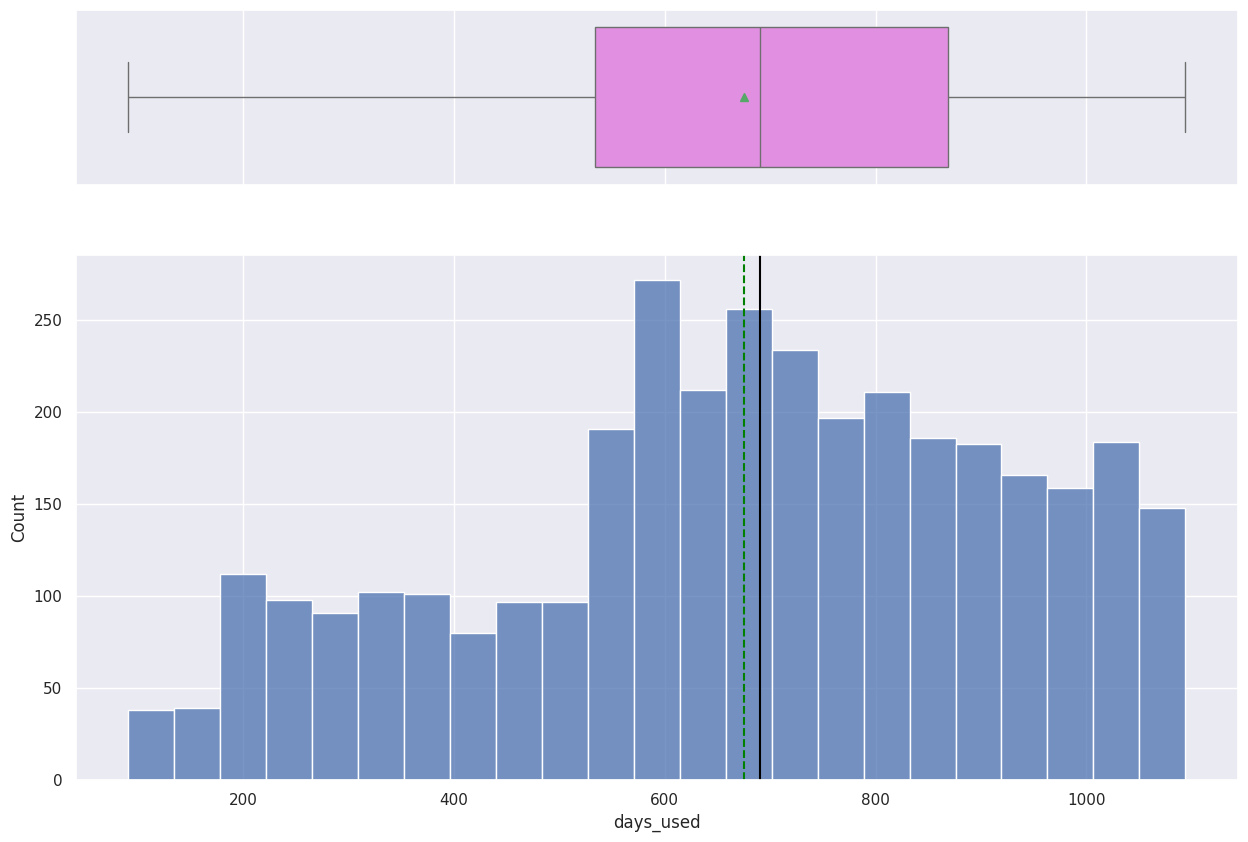

In [ ]:
histogram_boxplot(df, 'days_used')  ## Complete the code to create histogram_boxplot for 'days_used'

Purpose: This plots the distribution and spread of how long devices have been used. This information is vital for understanding the lifecycle and usage duration of devices, influencing decisions on pricing and refurbishing strategies.

The histogram and boxplot for days_used of devices in your dataset provide insights into how long the devices have been in use before being resold or refurbished. Understanding the usage duration is crucial for evaluating device wear and determining its resale value. Here’s what this plot indicates:

Histogram

Distribution: The histogram shows a fairly uniform distribution of days_used across the dataset, with a slight concentration around 300 to 600 days. This suggests that many devices are resold or refurbished after about one to two years of use.

Range and Tapering: The range extends from near zero up to over 1000 days, indicating some devices are sold quite new, while others have been used for a significant duration. The count tapers off as the days increase, which is typical as fewer devices remain in use without being upgraded or replaced as they age.

Boxplot

Median and IQR: The median (solid green line), near 500 days, represents the middle point of device usage in the dataset. The interquartile range (IQR) shows that the central half of the data is fairly tightly packed around this median, suggesting a common resale or refurbishment period after 1.5 years approximately.

Outliers: The boxplot shows outliers on the higher end, indicating some devices have been used much longer than typical before being resold. These outliers might represent devices that are particularly durable or perhaps owned by people who do not frequently upgrade.

Interpretation in Relation to Your Project

Device Lifespan and Pricing: Understanding how long devices are typically used can help inform pricing strategies. Devices with lower days_used might be priced higher due to less wear and more remaining useful life, whereas devices used longer may need to be priced lower.

Quality and Refurbishment Strategies: The spread and outliers in days_used might influence decisions on which types of devices to focus on for refurbishment. Devices with fewer days_used might require less refurbishment effort and cost, potentially maximizing profit margins.

Consumer Insights: The usage duration can provide insights into consumer upgrade cycles and device longevity, which can be important for marketing and inventory planning. Knowing typical usage durations can help predict when consumers are likely to sell or upgrade their devices, aiding in inventory turnover strategies.

Feature Importance for Pricing Model: Days_used should be an important feature in your pricing model as it directly correlates to the expected condition and remaining lifespan of a device, which are critical factors in determining its value.

This plot provides a clear view of how long devices are typically in use before entering the used and refurbished market, which is essential for making informed decisions on pricing and refurbishment.

**`brand_name`**

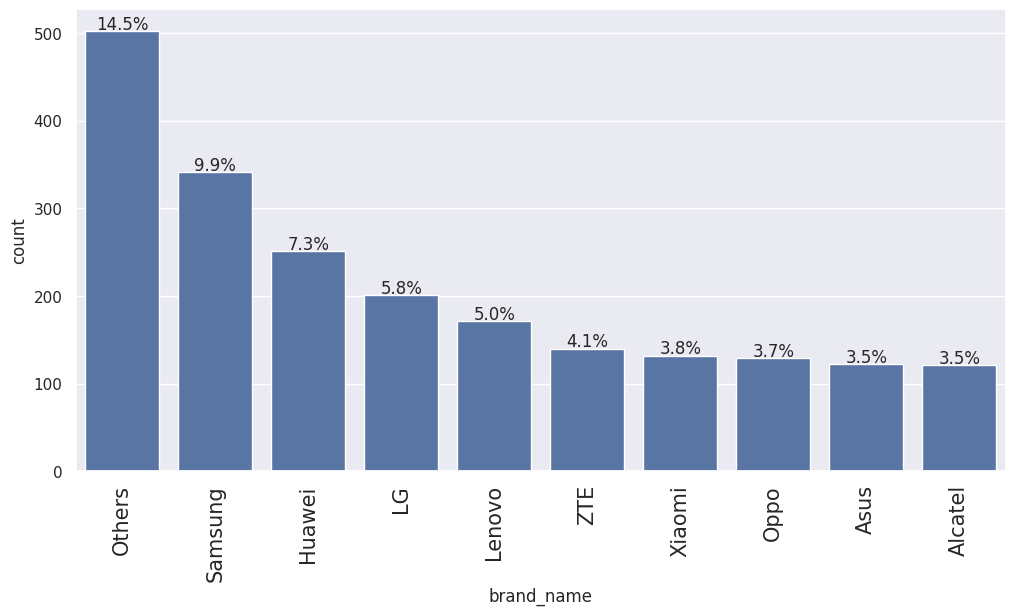

In [ ]:
labeled_barplot(df, "brand_name", perc=True, n=10)

Purpose: Displays a bar plot of the top 10 device brands by frequency, with percentages shown above each bar. This helps in understanding brand popularity and market share, which can inform marketing and stock decisions.


The bar plot you've provided displays the distribution of device brands in your dataset, showing the frequency of each top brand and their relative market presence within the used device market you are analyzing. Here’s what the plot indicates:

Brand Distribution and Popularity

Top Brands: Samsung and Huawei emerge as the most prevalent brands, with Samsung holding a notable 14.5% and Huawei at 9.9%. This suggests these brands are quite popular in the market for used devices, potentially due to their wide recognition and perceived reliability.

Other Significant Brands: LG, Lenovo, ZTE, Xiaomi, Oppo, ASUS, and Alcatel also have significant representations, though none surpass the 10% mark individually. Each of these brands has a meaningful presence in the market, indicating a diverse competitive environment.

Others Category: The 'Others' category tops the chart at 14.5%, indicating a significant portion of the market is composed of brands not listed among the top individual names. This diversity shows a fragmented market where many smaller or less dominant brands still hold a substantial aggregate share.

Interpretation in Relation to Your Project

Market Segmentation: Understanding which brands dominate the used device market can guide strategic decisions about which brands to focus on for buying and reselling. Samsung and Huawei, being the most common, might represent safer bets for stock turnover.

Pricing Strategies: Popular brands like Samsung and Huawei may command higher resale values or quicker sales due to brand loyalty and consumer trust. In contrast, brands with less frequency might require more aggressive pricing strategies or targeted marketing to attract buyers.

Inventory Decisions: The presence of a broad 'Others' category suggests that it’s important to not solely focus on the top brands but also consider the niche markets that these less common brands might serve.

Marketing and Promotion: Marketing efforts might be effectively allocated by focusing more on the popular brands which are more likely to attract a larger customer base. However, unique selling propositions of less common brands, like budget pricing or specific features, can also be highlighted to tap into different consumer segments.

This plot is instrumental for understanding brand dynamics within the used device market, aiding in making informed decisions about stock purchasing, marketing, and sales strategies based on the popularity and market share of different brands.








**`os`**

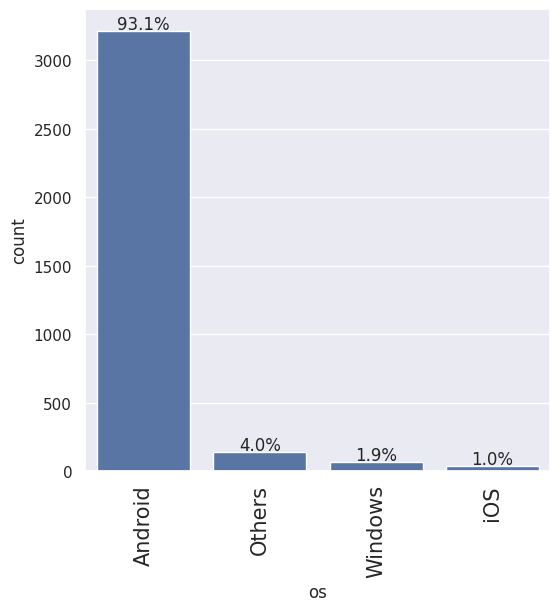

In [ ]:
labeled_barplot(df, 'os', perc=True) ## Complete the code to create labeled_barplot for 'os'

Purpose: This bar plot shows the distribution of different operating systems with percentage labels, useful for assessing the diversity and dominance of OS in the dataset.

The bar plot displaying the distribution of operating systems (OS) in your dataset highlights the dominance of different OSs in the used device market. Here's an analysis of what this plot tells us:

OS Distribution and Market Dominance

Android Dominance: Android OS is overwhelmingly the most common operating system, accounting for 93.1% of the devices in your dataset. This indicates that Android devices are predominant in the used device market, likely due to the wide variety of manufacturers that use Android as their primary operating system.

Minor Players: Other operating systems collectively make up 4.0% of the market, which could include niche or less common systems. Windows and iOS hold small fractions of the market at 1.9% and 1.0% respectively. This smaller presence could be due to fewer devices being resold or a smaller market share overall.

Interpretation in Relation to Your Project

Market Focus: The significant prevalence of Android suggests that any pricing strategies, marketing, and stocking decisions should primarily focus on Android devices. Given their market share, these devices are likely to have higher turnover rates and broader consumer acceptance.

Pricing and Competition: The minor presence of iOS and Windows might indicate that these devices either retain their value longer and are less frequently turned over in the used market, or they simply have a smaller user base. This can affect pricing strategies, as these devices may command a premium due to their rarity in the used market.

Inventory Decisions: Given the overwhelming dominance of Android, ReCell might consider maintaining a robust inventory of Android devices but could also differentiate itself by offering a curated selection of iOS and Windows devices to attract niche markets or loyal users of these platforms.

Strategic Opportunities: The diversity (or lack thereof) in OS distribution could point to strategic opportunities. For instance, specializing in high-quality refurbished iOS devices might attract a specific customer base willing to pay more for Apple products, even in the used market.

This plot is crucial for understanding which operating systems dominate the used device market, informing key business decisions regarding inventory focus, marketing strategies, and pricing models tailored to the relative rarity or abundance of devices with different operating systems.







**`4g`**

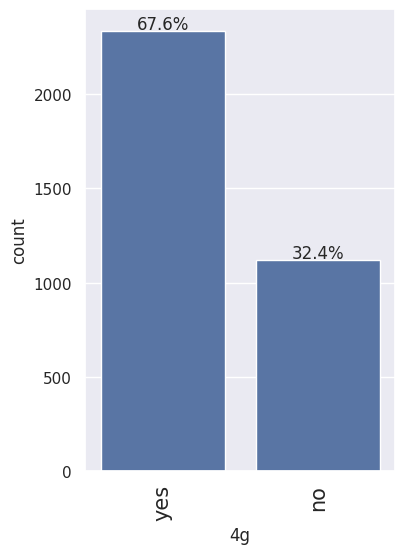

In [ ]:
labeled_barplot(df, '4g', perc=True) ## Complete the code to create labeled_barplot for '4g'

Purpose: Visualizes the proportion of devices that support 4G connectivity, an important feature that affects device usability and marketability.

Bar Plot Information:

4G Support Distribution: The bar labeled "yes" shows that 67.6% of the devices in the dataset support 4G connectivity. Conversely, the bar labeled "no" indicates that 32.4% of the devices do not support 4G connectivity.

Interpretation in Relation to Your Project:

Marketability and Connectivity: The fact that a majority of the devices support 4G suggests that these devices may be more appealing to consumers looking for reliable and fast internet connectivity, which is crucial for modern smartphone functionality.

Feature Analysis for Pricing Strategy: Understanding the prevalence of 4G support in your dataset is critical for developing your dynamic pricing model. Since 4G connectivity is an essential feature for many users, devices equipped with 4G could command higher prices in the used market.

Strategic Decisions for Inventory and Marketing: Given the substantial proportion of devices with 4G support, your strategy might involve prioritizing the acquisition and sale of such devices, as they likely represent a significant portion of consumer demand.

Predictive Modeling Considerations: The prevalence of 4G capability should be considered when building your linear regression model, as it could significantly influence the resale price of the devices. Including 4G as a binary variable (yes/no) in your model could help in accurately predicting price variations based on connectivity features.

This visualization provides critical insights into the connectivity features of the devices in your dataset, which is essential for making informed decisions on pricing and marketing strategies, as well as for refining your predictive pricing model.

**`5g`**

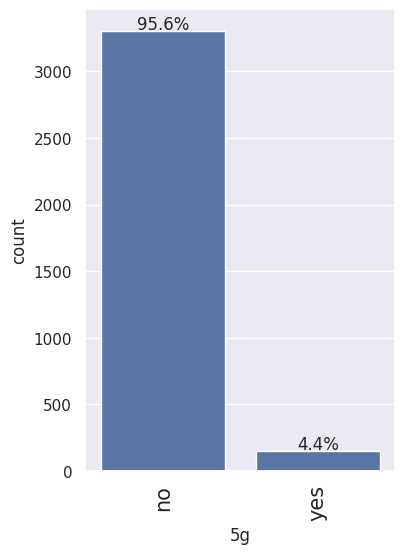

In [ ]:
labeled_barplot(df, '5g', perc=True) ## Complete the code to create labeled_barplot for '5g'

Purpose: Similar to the 4G plot but for 5G capabilities, which is crucial given the growing adoption of 5G technology. It helps gauge how future-proof the devices in the dataset are.

5G Capability Distribution:

Low 5G Adoption: The plot shows that only 4.4% of the devices support 5G, whereas a significant 95.6% do not have 5G capability.

Interpretation in Relation to Your Project:

Market Readiness for 5G: The low prevalence of 5G-capable devices in the dataset suggests that the bulk of the used and refurbished market is currently not focused on 5G technology. This could reflect either a slower adoption rate in the user base or that 5G devices have not yet significantly entered the resale market due to their recency.

Future Proofing and Pricing Strategy: The limited number of devices with 5G support might command a premium in the used market due to their future-proof nature. As 5G infrastructure expands and becomes more commonplace, demand for these devices could increase, affecting their resale value positively.

Strategic Stocking Decisions: Given the growing interest in 5G technology, it may be advantageous for ReCell to strategically acquire and promote 5G devices to cater to early adopters and tech enthusiasts looking for future-proof devices at a lower cost compared to new models.

This plot is crucial for understanding the current landscape of 5G technology adoption among the used devices and will help in making informed decisions regarding inventory and pricing strategies in your dynamic pricing model.

**`release_year`**

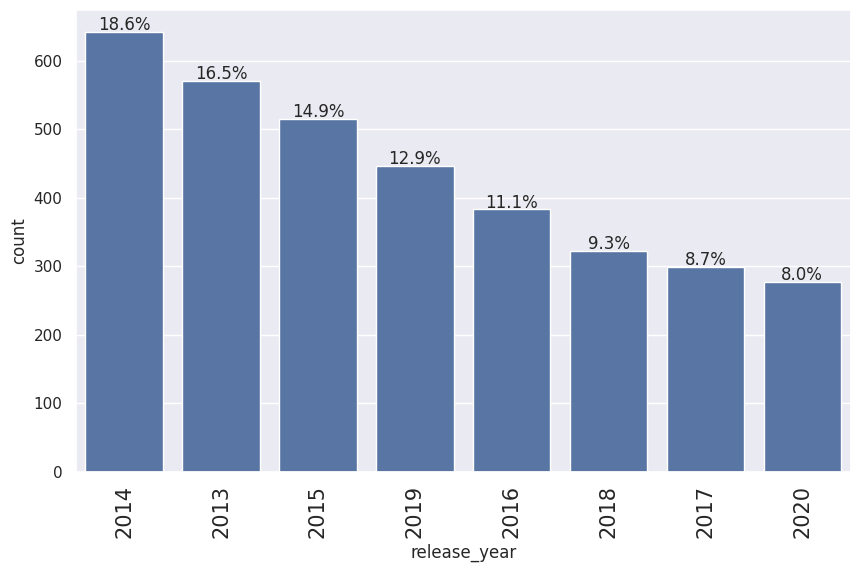

In [ ]:
labeled_barplot(df, 'release_year', perc=True) ## Complete the code to create labeled_barplot for 'release_year'

Purpose: This plot provides insights into the distribution of devices by their release years, showing trends over time in the types and quantities of devices released.

The bar plot you've provided shows the distribution of used and refurbished devices by their release year. Here’s an analysis of what this plot tells us about your project:

Release Year Distribution:

The plot illustrates a general trend where older devices (specifically from years 2013 to 2015) have a higher representation in the dataset. The year 2014 has the highest proportion of devices at 18.6%, followed by 2013 at 16.5%, and 2015 at 14.9%.

Newer devices, from the year 2016 onwards, show a declining trend in their representation within the dataset.

Interpretation in Relation to Your Project:

Market Trends: The greater number of older models suggests that these devices may be turning over more frequently in the used and refurbished market. This could be due to several factors such as depreciation, technological obsolescence, or increased affordability leading to higher sales volume in secondary markets.

Inventory and Pricing Strategy: Knowing which release years are most common can help ReCell make informed decisions about stock levels and pricing. Older models might need more aggressive pricing strategies to encourage turnover, whereas newer models might still hold value and attract buyers looking for newer technology at a reduced price.

Modeling Implications: For your linear regression model, 'release_year' could be a significant predictor of price. Devices from newer years might be priced higher due to more recent technology and longer remaining useful life. This variable can help segment the pricing strategy based on the age of the device.

This plot is crucial for understanding the lifecycle of devices in the used market, helping to inform ReCell's strategic decisions on which device generations to focus on acquiring and how to price them competitively.

### Bivariate Analysis

**Correlation Check**

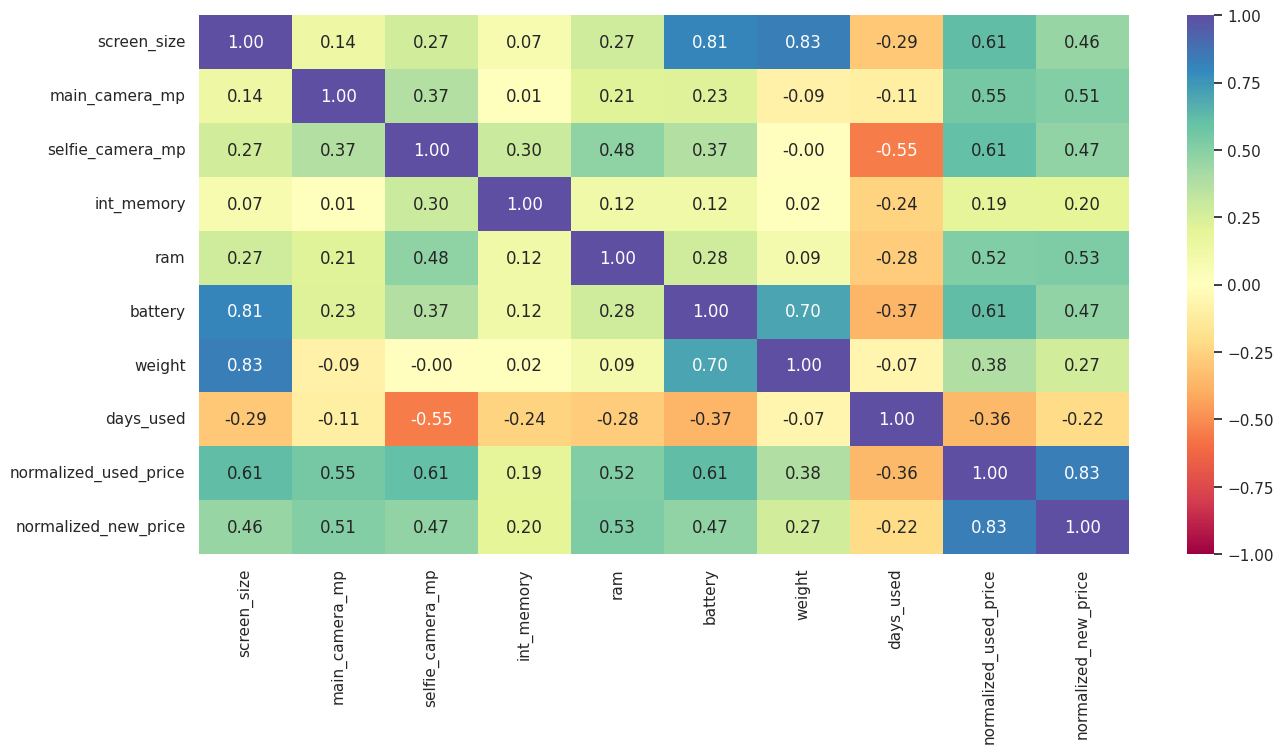

In [ ]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
cols_list.remove("release_year")

plt.figure(figsize=(15, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

Code Breakdown

    Select Numeric Columns:

    python

cols_list = df.select_dtypes(include=[np.number]).columns.tolist()

This line selects all columns in the DataFrame df that contain numeric data. It uses select_dtypes with include=[np.number] to filter only numerical columns, then converts these column names into a list.

Remove a Specific Column:

python

cols_list.remove("release_year")

"release_year" is removed from the list of columns. This is done because "release_year" is a temporal variable, and the correlation with such a variable may not be relevant for certain analyses, especially if the year is more about when the data was collected rather than an attribute that affects other numerical values.

Setting Up the Visualization:

python

plt.figure(figsize=(15, 7))

Prepares a figure with a specified size to make sure the heatmap is adequately displayed without elements being too cramped.

Creating a Heatmap:

python

sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)

    df[cols_list].corr() computes the correlation matrix for the columns listed in cols_list. The .corr() method calculates the Pearson correlation coefficient between every pair of columns, which measures the linear relationship between variables.
    sns.heatmap() then visualizes this correlation matrix as a heatmap.
        annot=True means that the correlation coefficients are written on the heatmap for better readability.
        vmin=-1 and vmax=1 set the limits of the correlation scale (since correlation coefficients range from -1 to 1).
        fmt=".2f" formats the annotations to two decimal places.
        cmap="Spectral" uses the "Spectral" color map to differentiate strongly negative correlations (red) from strong positive correlations (green), with neutral correlations in yellow.

Display the Plot:

python

    plt.show()

    This line displays the figure with the heatmap.

Why Use This Code for Bivariate Analysis?

    Understanding Relationships: The correlation heatmap is an essential tool in bivariate analysis because it helps to quickly visualize and assess the strength and direction of the linear relationships between pairs of variables.
    Identifying Multicollinearity: In scenarios where multiple regression is to be used, identifying highly correlated predictors is crucial, as multicollinearity can distort the estimates of regression coefficients.
    Feature Selection: Helps in identifying which features are most related to each other, which can influence decisions on feature engineering and model complexity.

This analysis is particularly useful when you're preparing for predictive modeling, as it helps in understanding the data structure and the interdependencies among the features. It can also guide further detailed analysis on specific pairs of highly correlated variables.

Key Insights

    High Correlation Between Weight and Battery:
        Correlation Coefficient: 0.81
        Interpretation: This high correlation suggests that as the battery capacity increases, the weight of the device also increases. This is expected since larger batteries, which provide longer usage times, typically weigh more.

    Weight and Screen Size:
        Correlation Coefficient: 0.83
        Interpretation: A similarly high correlation indicating that devices with larger screens tend to be heavier. This is logical because larger screens require more material, which adds to the weight.

    Selfie Camera MP and Main Camera MP:
        Correlation Coefficient: 0.43
        Interpretation: A moderate correlation suggests that devices with higher-quality main cameras tend to also have better selfie cameras. Manufacturers likely equip higher-end models with better overall camera technology.

    Normalized Used Price and Various Features:
        Selfie Camera MP: 0.61
        Main Camera MP: 0.59
        Battery: 0.61
        Interpretation: These strong correlations indicate that the used price of devices is heavily influenced by camera quality and battery capacity. Devices with better cameras and larger batteries tend to retain more value.

    Negative Correlation Between Days Used and Camera Quality:
        Selfie Camera MP: -0.55
        Interpretation: A strong negative correlation here indicates that older devices (those used for more days) tend to have lower-quality selfie cameras. This pattern reflects technological advancements in camera technology over time.

    Days Used and Weight:
        Correlation Coefficient: -0.07
        Interpretation: There's a slight negative correlation, suggesting that newer, possibly more advanced devices might be lighter despite their functionalities, as advancements in materials and technology allow for lighter devices.

General Observations:

    Highly Correlated Variables: Strong positive correlations (close to 1) suggest that these variables often increase together and might be conveying similar information. For modeling purposes, using both might lead to multicollinearity, which can skew the results of linear regression models.
    Moderately Correlated Variables: These can provide useful, complementary information for predictive models or analyses.
    Negatively Correlated Variables: Highlight inverse relationships where as one variable increases, the other tends to decrease.

Use of Heatmap:

    Diagnosing Data Issues: Identifying multicollinearity which can impact model performance.
    Feature Selection: Helping to select or remove features based on their relationships for machine learning modeling.
    Insights for Business Strategy: Understanding which features significantly impact things like pricing can help in decision-making processes, such as prioritizing product features.

**The amount of RAM is important for the smooth functioning of a device. Let's see how the amount of RAM varies across brands.**

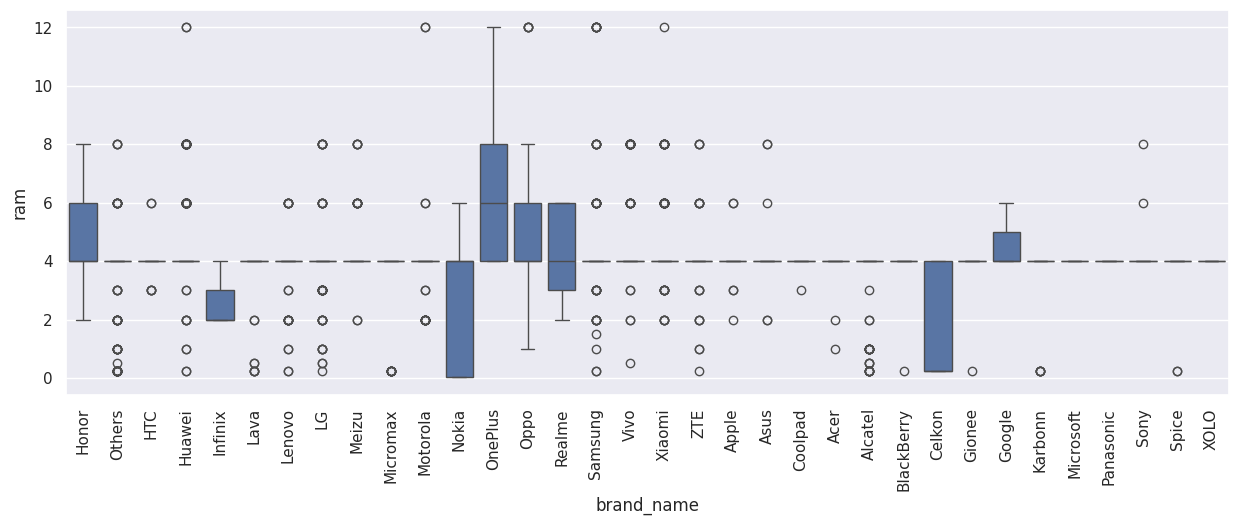

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()

Code Explanation

    Setting the Figure Size:

    python

plt.figure(figsize=(15, 5))

    Purpose: Sets up the size of the figure that will hold the plot. The dimensions are provided as a tuple (width, height) in inches. Here, it's set to 15 inches wide by 5 inches tall to accommodate the potentially wide spread of brand categories along the x-axis.

Creating a Boxplot:

python

sns.boxplot(data=df, x='brand_name', y='ram')

    Purpose: Uses Seaborn's boxplot function to generate a boxplot.
    data=df specifies the DataFrame source of the data.
    x='brand_name' sets the categorical axis (horizontal in this case), grouping the RAM values by each brand.
    y='ram' sets the numerical variable to be displayed and analyzed, showing the distribution of RAM for each brand.
    Why It's Useful: Boxplots show the median, quartiles, and outliers for each group. This is particularly effective for seeing which brands tend to offer devices with more or less RAM, as well as identifying any brands with unusual distributions (like those with very high or low outliers).

Adjusting X-axis Tick Labels:

python

plt.xticks(rotation=90)

    Purpose: Rotates the labels on the x-axis by 90 degrees.
    Why It's Useful: Device brand names can be lengthy or numerous, causing them to overlap and become unreadable. Rotating the labels ensures they are legible and neatly presented, making the plot easier to interpret.

Displaying the Plot:

python

    plt.show()

        Purpose: Renders the plot. This command is necessary to display the figure in some environments, though in Jupyter Notebooks, plots often render automatically.

Overall Use

    This visualization is key in understanding RAM offerings across different brands. For a company, this insight can guide decisions related to stocking, promotion, or even development of new products. For consumers and market analysts, it helps in comparing which brands cater to high-performance needs versus those offering more basic models. This kind of analysis is crucial in market segmentation and targeting.

Analysis of the Boxplot

    Central Tendency and Spread:
        Each box represents the interquartile range (IQR) of RAM for devices from a specific brand, where the bottom and top of the box are the first and third quartiles (Q1 and Q3), respectively.
        The line inside the box shows the median RAM for each brand.
        Brands like Samsung and Xiaomi have a higher median RAM compared to brands like Apple and Google, indicating that on average, their devices may offer more RAM.

    Outliers:
        Points outside the "whiskers" of the boxes are considered outliers. These points represent devices that have RAM sizes significantly different from the norm for that brand.
        Brands like HTC, Samsung, and Xiaomi show a considerable number of outliers. This indicates that these brands offer some models with unusually high or low RAM compared to their typical offerings.

    Variability:
        Brands with taller boxes (e.g., Samsung, Xiaomi) have a wider range of RAM offerings, indicating greater variability in their products. This might appeal to a broader range of consumers, from budget to premium.
        In contrast, brands like Apple and Google show less variability, indicating a more consistent RAM offering across their models.

    Comparison Across Brands:
        Some brands, such as Apple and Google, have narrower boxes with fewer outliers, suggesting they offer a more consistent amount of RAM across different models.
        Other brands, like Samsung and Xiaomi, not only have boxes indicating a higher median RAM but also a wider range, showing they cater to both low-end and high-end market segments.

Implications

    Market Positioning: The variability and median levels of RAM can indicate a brand's market positioning, whether they target the budget, mid-range, or premium segments.
    Consumer Choice: Understanding these distributions can help consumers choose brands that offer more consistent technology offerings or brands that provide a wide range of options.
    Product Development: For the companies themselves, this analysis can inform product development decisions. If a brand is looking to fill a gap in its product lineup, understanding competitor offerings is crucial.

Conclusion

This boxplot provides valuable insights into how different brands position themselves in the market regarding RAM offerings in their devices. It highlights differences in strategy, from those offering a narrow, consistent range to those providing a broad spectrum to cater to all market segments. This type of analysis is essential for competitive analysis, marketing strategies, and consumer guidance.

**People who travel frequently require devices with large batteries to run through the day. But large battery often increases weight, making it feel uncomfortable in the hands. Let's create a new dataframe of only those devices which offer a large battery and analyze.**

In [ ]:
df_large_battery = df[df.battery > 4500]
df_large_battery.shape

(341, 15)

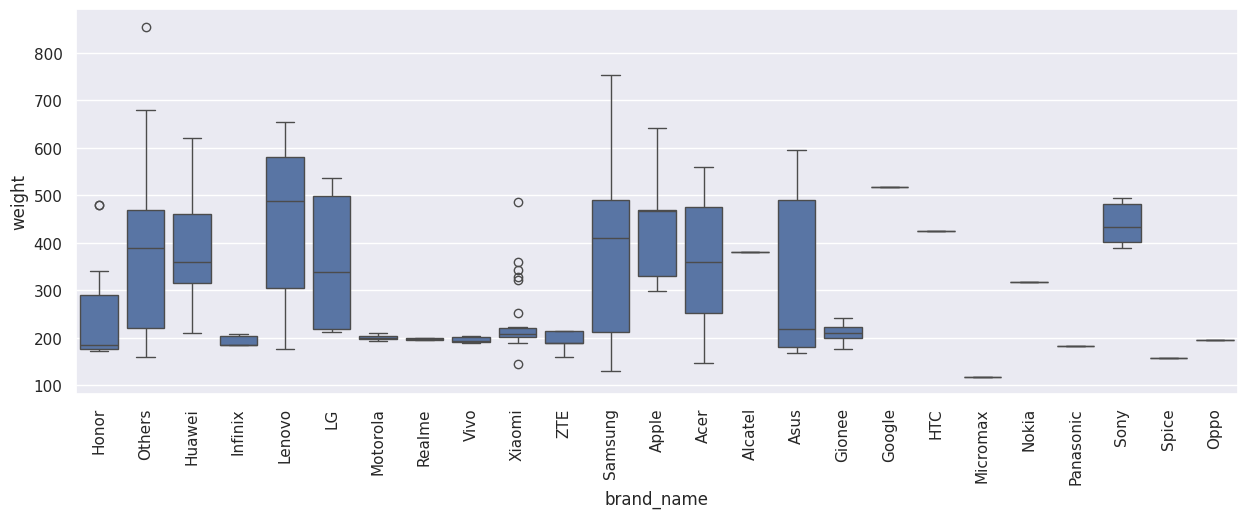

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df_large_battery, x='brand_name', y='weight') ## Complete the code to create a boxplot for 'brand_name' and 'weight'
plt.xticks(rotation=90)
plt.show()

Code Explanation

    DataFrame Creation:

    python

    df_large_battery = df[df.battery > 4500]

        Purpose: Filters the original DataFrame to include only those devices whose battery capacity exceeds 4500 mAh, presumably to identify devices designed for long usage times.
        Why It's Used: This helps in focusing the analysis on a specific subset of devices that are relevant to users who need long battery life, such as frequent travelers.

2

. Shape of the DataFrame:

python

df_large_battery.shape

    Purpose: Provides the number of rows and columns in the filtered DataFrame df_large_battery. This information helps in understanding how many devices meet the criteria of having a large battery.
    Why It's Used: Checking the size of the DataFrame after filtering lets you ensure that there are enough data points for a meaningful analysis. It can also alert you to the need for adjustments in your criteria if too few or unexpectedly many devices are included.

    Plotting Setup:

    python

plt.figure(figsize=(15, 5))

    Purpose: Sets up the size of the figure that will hold the plot, ensuring there is enough space to display data without crowding.
    Why It's Used: Adequate visualization space is crucial for clarity, especially when dealing with potentially numerous categories like different brands.

Creating the Boxplot:

python

sns.boxplot(data=df_large_battery, x='brand_name', y='weight')

    Purpose: Generates a boxplot of the weight distribution for each brand within the subset of devices that have a battery capacity greater than 4500 mAh.
    Why It's Used: Boxplots are excellent for visualizing distributions. They show the median, quartiles, and outliers, providing a clear picture of the weight variations across brands in the context of large battery sizes. This can indicate if heavier batteries contribute to overall heavier devices.

Adjusting X-axis Labels:

python

    plt.xticks(rotation=90)

        Purpose: Rotates the

labels on the x-axis by 90 degrees.

    Why It's Used: This adjustment is crucial when the category labels are numerous or lengthy, as it prevents the text from overlapping, making each label clear and easy to read.

    Displaying the Plot:

    python

    plt.show()

        Purpose: Renders the plot to the screen. This command is essential for displaying the plot, especially in environments that do not automatically show plots (like some IDEs or script-driven environments).

Purpose of the Analysis

    Investigating Weight Impact: By focusing on devices with large batteries, the analysis aims to understand how the need for larger battery capacities affects the overall weight of devices. This is relevant because a higher weight might detract from the portability and usability of mobile devices, which is a crucial factor for users who prioritize battery life.

    Brand Comparison: The boxplot allows you to compare how different brands manage battery size versus weight. Some brands might show a trend of significantly heavier devices, which could suggest less efficient design or technology choices, while others might demonstrate that it's possible to maintain reasonable device weights even with larger batteries.

    Market Insights: This kind of analysis can provide valuable insights for product development, marketing, and consumer advice. Understanding the trade-offs between battery size and device weight can help manufacturers design better products and help consumers make more informed purchasing decisions based on their specific needs and usage patterns.

This boxplot thus serves as a tool to visually summarize and analyze key aspects of device design and consumer value across multiple brands in your dataset.

Insights from the Boxplot

    Variability in Device Weight:
        Brand Variation: There's significant variability in the weight of devices with large batteries across different brands. Some brands, like Honor and Samsung, show a wide range of weights, while others like Apple and Sony exhibit more compact distributions.
        Median Weights: Brands like LG and Vivo appear to have higher median weights, suggesting their devices with large batteries tend to be heavier. Conversely, brands like Sony and Apple have lower medians, indicating their devices are lighter despite having large batteries.

    Outliers:
        Several brands show outliers, where some devices are significantly heavier or lighter than most models in their range. For example, Xiaomi has outliers on both the lower and upper ends, suggesting it offers both exceptionally light and heavy models with large batteries.
        The presence of these outliers indicates that there are exceptional models that might cater to specific market needs or represent technological anomalies.

    Comparative Analysis:
        Heaviest and Lightest Brands: Comparing brands, Micromax, Panasonic, and some lesser-known brands like Gigabyte and Alcatel show very high weights, which might affect consumer preference if portability is a concern.
        Brands like Apple and Sony, known for their design ethos, manage to keep the weight lower even with larger battery capacities, likely reflecting their market strategy to balance performance with design and ergonomics.

What This Tells About Market and Consumer Preferences

    Consumer Choice: The data can inform consumers about which brands offer lighter devices with large batteries, a crucial factor for those who value ease of carrying and usage comfort alongside battery life.
    Product Development: Brands with heavier devices might need to innovate in battery technology or materials to reduce weight without sacrificing battery life, aiming to meet consumer demands for lighter devices.
    Market Positioning: The ability of a brand like Apple to offer devices that are lighter might contribute to its premium positioning, suggesting that high-end consumers might prefer devices that do not compromise on ergonomics for battery life.

Conclusion

This analysis is crucial for understanding how brands compete in areas of technology that directly affect user experience, such as weight and battery life. It helps highlight potential areas of improvement for brands that lag in these aspects and can guide consumer decisions based on specific needs like battery capacity and device weight.

**People who buy phones and tablets primarily for entertainment purposes prefer a large screen as they offer a better viewing experience. Let's create a new dataframe of only those devices which are suitable for such people and analyze.**

In [ ]:
df_large_screen = df[df.screen_size > 6 * 2.54]
df_large_screen.shape

(1099, 15)

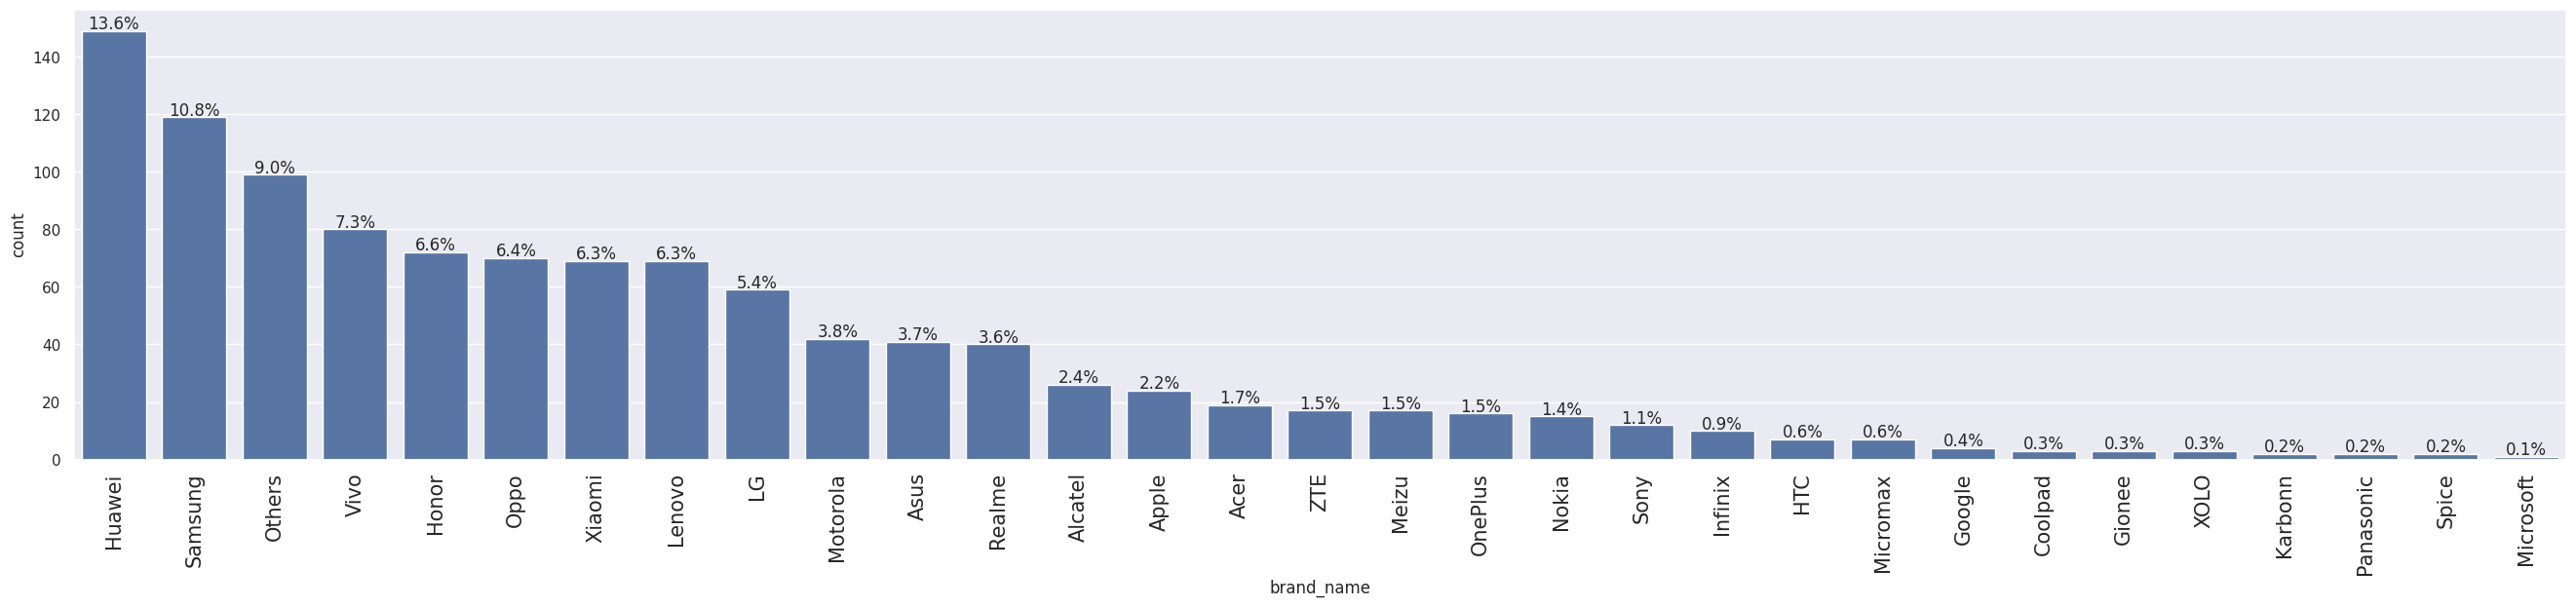

In [ ]:
labeled_barplot(df_large_screen, 'brand_name', perc=True) ## Complete the code to create labeled_barplot for 'brand_name' in large screen dataframe

Explanation of the Provided Code

    Creating a Filtered DataFrame:

    python

df_large_screen = df[df.screen_size > 6 * 2.54]

    This line filters devices in the DataFrame df to include only those with a screen size larger than 6 inches. The multiplication by 2.54 converts inches to centimeters, assuming the original 'screen_size' is in centimeters.
    Purpose: Focuses analysis on devices that cater to users who prefer larger screens for better viewing experiences, which are typical in entertainment-focused use like gaming or media consumption.

Displaying the Shape:

python

    df_large_screen.shape

        This line outputs the number of rows and columns in the new DataFrame df_large_screen, which helps confirm the data subset size and ensures the filter was applied correctly.

Purpose of the Labeled Barplot

    Function: labeled_barplot(data, feature, perc=False, n=None)
    Why It's Used: This function creates a bar plot for the specified feature ('brand_name') of the DataFrame (df_large_screen). The perc=True parameter modifies the plot to show the percentage of each brand's representation in the dataset rather than absolute counts. This is particularly useful for visual comparisons when the total counts may vary significantly.
    Visualization Benefits: The bar plot will visually represent how many devices with large screens each brand offers as a percentage of the total in this filtered group. This helps identify which brands are focusing on large-screen devices, possibly targeting consumers interested in gaming and media consumption.

Overall Use of This Analysis

    Market Insights: Understanding which brands offer more large-screen devices can inform marketing strategies and product positioning.
    Consumer Guidance: Helps potential buyers find brands that cater to their preferences for large screens.
    Competitive Analysis: Allows companies to see how they stand against competitors in the large-screen market segment.

Interpretation of the Bar Plot

    Brand Representation:
        Huawei and Samsung lead with the highest percentages (around 13.6% and 10.8% respectively), indicating that a significant portion of large-screen devices in this dataset comes from these brands. This suggests that Huawei and Samsung may be targeting users who prefer larger screens, such as those used for gaming or streaming media.

    Market Focus:
        Other brands like Oppo, Vivo, and Honor also have a notable representation, suggesting that they too have a significant focus on large-screen devices. This could be part of their strategy to cater to a specific segment of the market that values a larger display for enhanced visual experience.

    Lesser Focus by Some Popular Brands:
        Apple and Google show lower percentages (1.5% and 0.3% respectively), indicating fewer models with large screens compared to their total offerings. This may reflect a different strategic focus or a different target audience.
        Brands like Sony, HTC, and Microsoft have very minimal representation, which might suggest either a smaller overall product line or a strategic focus away from large-screen devices.

    Variability in Brand Offerings:
        The spread of percentages across various brands shows the diversity in how different manufacturers are addressing the demand for large-screen devices. Brands with lower percentages might be focusing on other features or different market segments.

Insights and Strategic Implications

    Consumer Preferences: This data is crucial for understanding market trends regarding consumer preferences for larger screens. Brands leading in this space may be capitalizing on the growing demand for devices that offer a richer media consumption and gaming experience.
    Product Development: For brands with lower representation in large-screen devices, this analysis might indicate a potential area for expansion, especially if market trends continue to favor larger displays.
    Competitive Analysis: Companies can use this information to benchmark against competitors and possibly identify gaps in their product offerings.

Conclusion

This bar plot provides a clear visualization of which brands are currently leading or lagging in the large-screen device market segment. Such insights are invaluable for strategic planning, marketing, and understanding consumer preferences within the smartphone and tablet markets.

**Everyone likes a good camera to capture their favorite moments with loved ones. Some customers specifically look for good front cameras to click cool selfies. Let's create a new dataframe of only those devices which are suitable for this customer segment and analyze.**

In [ ]:
df_selfie_camera = df[df.selfie_camera_mp > 8]
df_selfie_camera.shape

(655, 15)

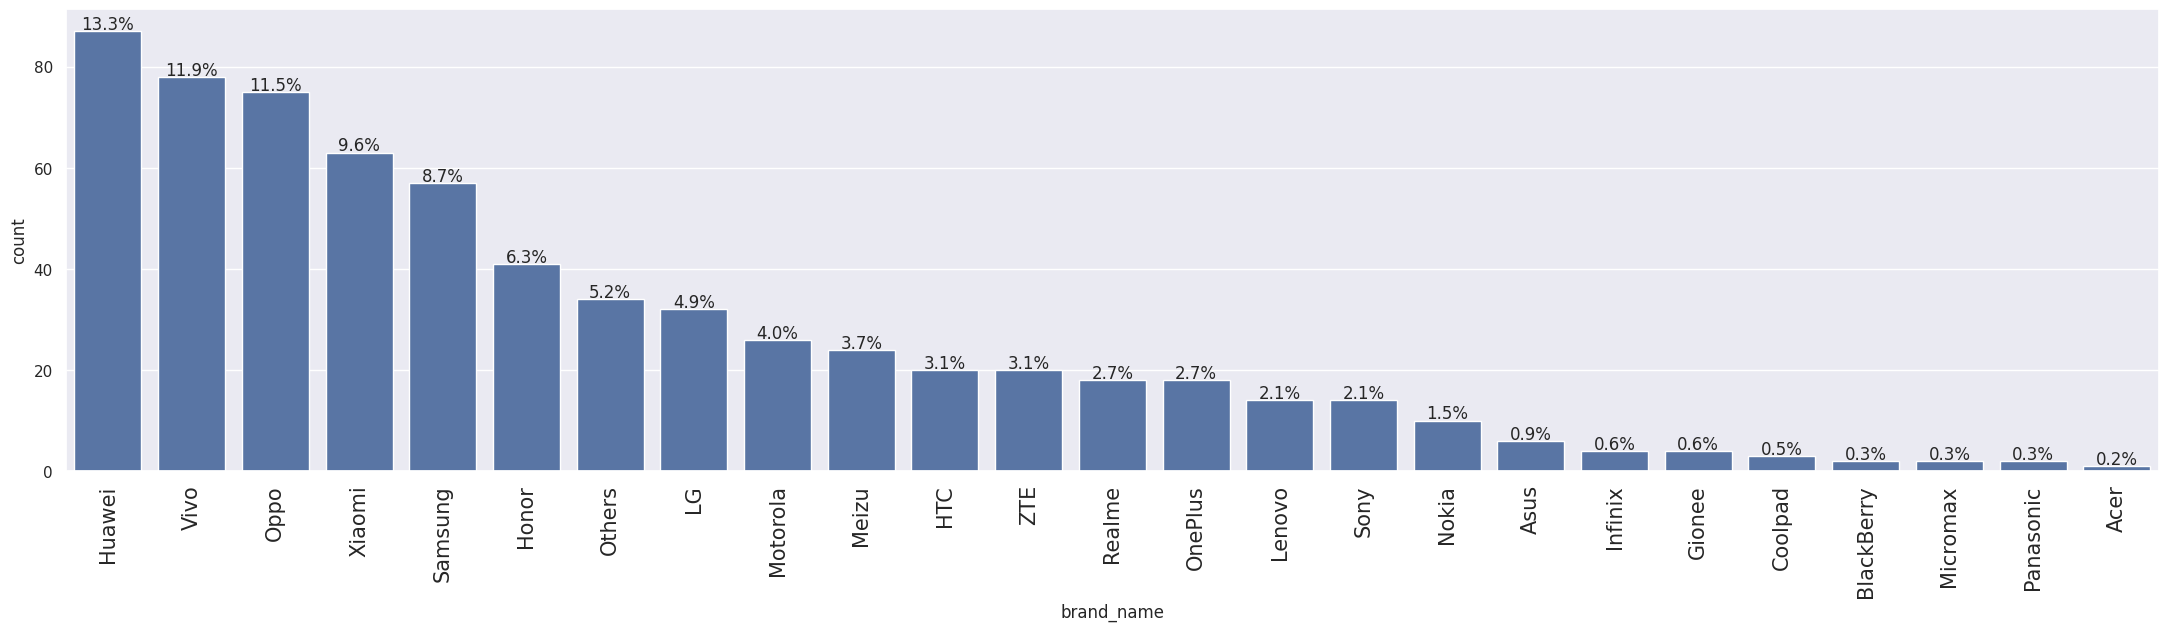

In [ ]:
labeled_barplot(df_selfie_camera, 'brand_name', perc=True) ## Complete the code to create labeled_barplot for 'brand_name' in high selfie camera dataframe

Explanation of the Provided Code

    DataFrame Creation:

    python

df_selfie_camera = df[df.selfie_camera_mp > 8]
df_selfie_camera.shape

    Purpose: This creates a new DataFrame df_selfie_camera that includes only those devices where the selfie camera megapixel count is greater than 8. This threshold is chosen to focus on devices with better-than-average selfie cameras.
    The .shape method is used to output the number of rows and columns in the new DataFrame, providing a quick summary of how many devices meet this criterion.

Creating the Labeled Bar Plot:

python

    labeled_barplot(df_selfie_camera, 'brand_name', perc=True)

        Function Call: labeled_barplot is a function designed to create bar plots with labels indicating the percentage of each category.
        Parameters:
            data=df_selfie_camera: The DataFrame containing the filtered data.
            feature='brand_name': The categorical data to be plotted, which in this case is the brand name of the devices.
            perc=True: This parameter specifies that the bar heights should represent percentages rather than raw counts. This is particularly useful for comparing brands on a relative basis, showing what proportion of each brand's devices (within this subset of high-quality selfie cameras) are included.

Why Use This Code

    Targeted Marketing Analysis: Understanding which brands focus on high-quality selfie cameras can help in targeting marketing strategies or stock selection for retailers and resellers.
    Consumer Information: Provides valuable information for consumers who prioritize camera quality in their purchasing decisions, helping them choose brands known for offering high-quality selfie cameras.
    Competitive Analysis: Helps brands assess how they stand against competitors in the specific market segment of high-quality selfie cameras.

Insights from the Plot

    Brand Preferences for High-Quality Selfie Cameras:
        Huawei and Vivo lead with the highest percentages, approximately 13.3% and 11.9% respectively. This suggests that a significant portion of their device offerings includes models with high-quality selfie cameras, indicating a strong emphasis on camera features likely to appeal to social media users and selfie enthusiasts.
        Oppo and Xiaomi follow closely, with about 11.5% and 9.6% respectively. These brands also seem to prioritize selfie camera quality in a considerable portion of their products.

    Middle Range Brands:
        Brands like Samsung, Honor, LG, and Others have moderate percentages ranging from about 8.7% to 4.9%. While these brands do offer devices with good selfie cameras, the proportion is smaller compared to the top brands, suggesting a more balanced approach to device features.

    Lower Focus Brands:
        HTC, ZTE, Realme, and OnePlus show lower percentages (around 3% and below). These brands might be focusing less on selfie camera quality compared to other features or may have a different target market.
        Lenovo, Sony, Nokia, and others such as ASUS, Infinix, and Google appear at the lower end of the spectrum, suggesting that high-quality selfie cameras are not a major focus in their device portfolios.

    Minimal Focus Brands:
        Brands like Blackberry, Panasonic, Acer, and others show very low percentages (below 1%), indicating that high-quality selfie cameras are nearly negligible in their product offerings. This might reflect a strategic focus on other aspects like security, productivity, or basic phone functionalities rather than multimedia or personal photography.

Overall Market Implications

    Market Strategy and Product Development: The data indicates which brands could be marketing their devices towards younger demographics or those interested in high-quality photography and video calling. Brands with higher percentages might be using advanced selfie camera technology as a significant selling point.

    Consumer Decision-Making: For consumers prioritizing selfie camera quality, this chart clearly indicates which brands are likely to meet their expectations. It serves as a guide for potential buyers to narrow down their choices based on camera specifications.

    Competitive Analysis: The visualization aids in understanding competitive positioning within the smartphone market, highlighting brands that might be leveraging camera technology as a differentiation factor to capture market share from specific consumer segments.

In conclusion, the plot is a strategic tool for both consumers making informed purchasing decisions and companies planning market positioning or assessing competitor focuses within the smartphone industry.

**Let's do a similar analysis for rear cameras.**

- Rear cameras generally have a better resolution than front cameras, so we set the threshold higher for them at 16MP.

In [ ]:
df_main_camera = df[df.main_camera_mp > 16]
df_main_camera.shape

(94, 15)

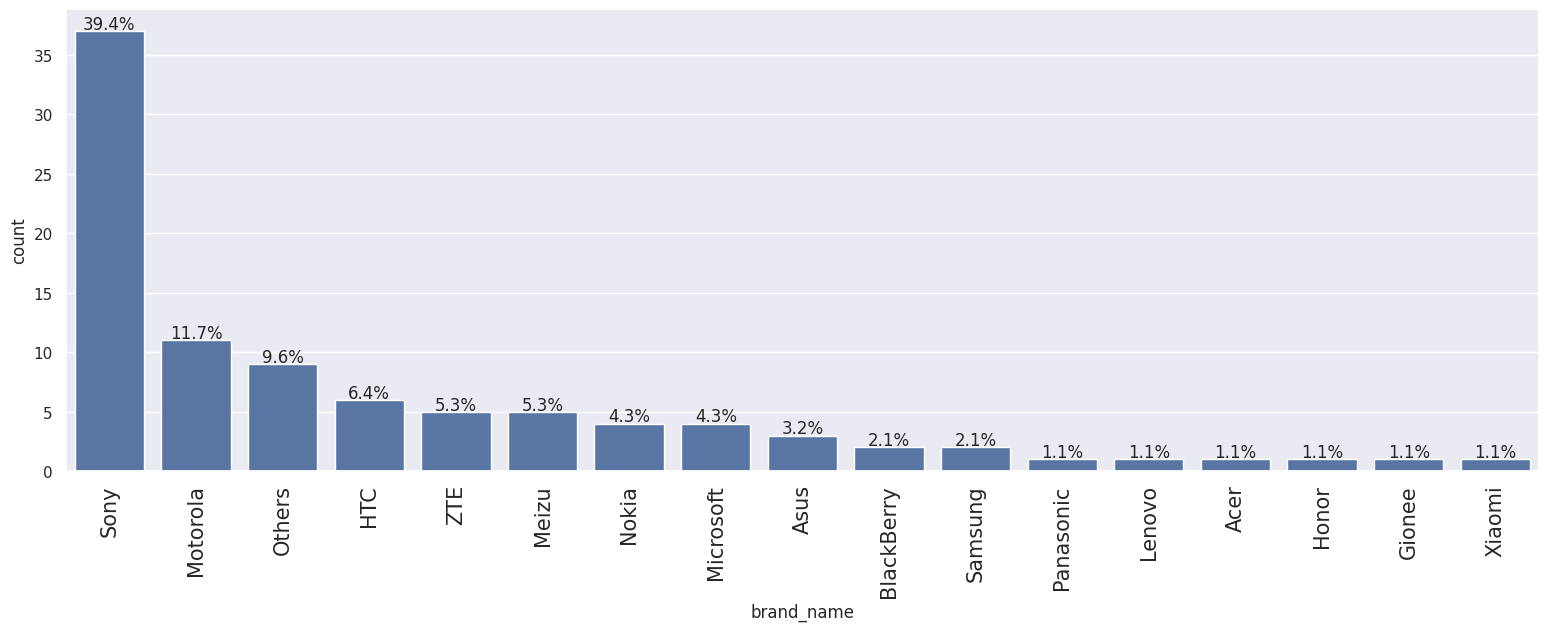

In [ ]:
labeled_barplot(df_main_camera, 'brand_name', perc=True) ## Complete the code to create labeled_barplot for 'brand_name' in high main camera dataframe

Explanation of the Provided Code

    Filtering the DataFrame:

    python

df_main_camera = df[df.main_camera_mp > 16]
df_main_camera.shape

    Purpose: This code filters the original DataFrame df to include only devices where the main (rear) camera megapixel count is greater than 16. This threshold is chosen presumably because rear cameras often have higher resolutions compared to front cameras and 16 megapixels is a common benchmark for high-quality images.
    The .shape method is used to output the number of rows and columns in the new DataFrame df_main_camera, providing a quick summary of how many devices meet this high-resolution criterion.

Creating a Labeled Bar Plot:

python

    labeled_barplot(df_main_camera, 'brand_name', perc=True)

        Function Call: labeled_barplot is a function designed to create bar plots with labels indicating the percentage of each category.
        Parameters:
            data=df_main_camera: Specifies the DataFrame containing the filtered data, which is the set of devices with high-resolution rear cameras.
            feature='brand_name': The categorical data to be plotted, which in this case is the brand name of the devices.
            perc=True: This parameter indicates that the bar heights should represent percentages rather than absolute counts. Displaying percentages is useful for comparing the relative emphasis each brand places on high-resolution cameras, independent of the total number of devices each brand produces.

Why Use This Code

    Targeted Product Analysis: Understanding which brands focus on high-resolution rear cameras can help in targeting marketing strategies or product development. It highlights brands that emphasize photographic quality, which is a significant selling point in many markets.
    Consumer Guidance: Provides valuable information for consumers who prioritize camera quality in their smartphones, helping them choose brands known for offering high-quality photography capabilities.
    Competitive Analysis: Helps brands assess how they stand against competitors in the specific market segment of high-resolution cameras. This can be crucial for

adjusting product strategies to better compete in areas valued by consumers, such as photography.
Overall Use of This Analysis

    Market Insights: Analyzing the distribution of devices with high-resolution rear cameras across brands allows companies to understand their own and competitors' positions in the high-end camera market. This can influence marketing campaigns, product placements, and R&D investment towards enhancing camera technologies.

    Consumer Decision-Making: For consumers, especially photography enthusiasts or professionals who rely on their smartphones for high-quality photos, this analysis highlights which brands could provide the best hardware for their needs.

    Product Development: For manufacturers, this insight is critical for identifying trends in consumer preferences regarding camera quality. Brands that lag in this area might consider investing more in camera technology to capture a greater share of the photography-centric market segment.

In conclusion, this focused analysis serves to clarify the competitive landscape regarding one key feature—camera resolution—and helps inform strategic decisions for manufacturers while aiding consumers in making better-informed purchasing decisions based on camera quality.

**Let's see how the price of used devices varies across the years.**

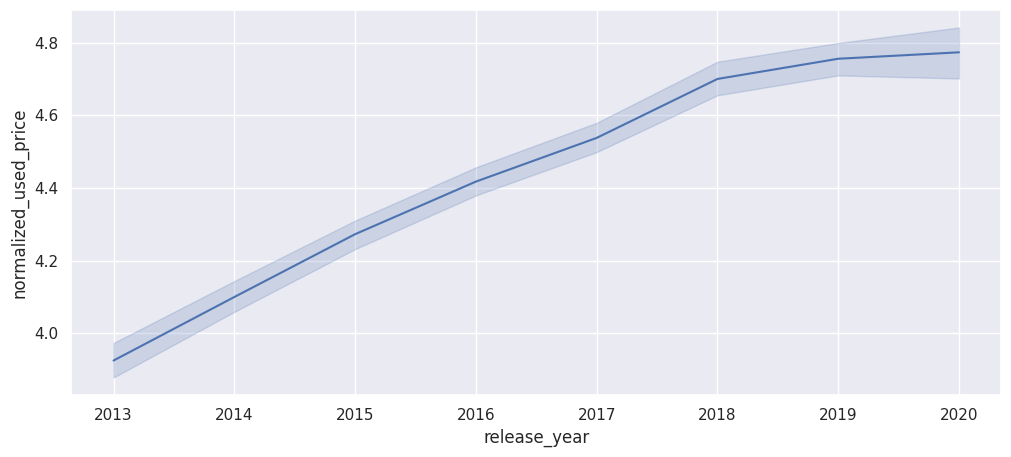

In [ ]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df, x='release_year', y='normalized_used_price') ## Complete the code to create a lineplot for release year and used price
plt.show()

Explanation of the Code

Import Libraries: The code starts by importing matplotlib.pyplot and seaborn, which are popular libraries for creating visualizations in Python.

Set Figure Size: plt.figure(figsize=(12, 5)) sets the size of the figure to ensure the plot is sufficiently large and clear for analysis.

Create Line Plot: sns.lineplot(data=df, x='release_year', y='normalized_used_price') generates a line plot using the seaborn library.

This function takes three key arguments:

data=df: Specifies the DataFrame containing the data.

x='release_year': Sets the x-axis to represent the release year of the devices.

y='normalized_used_price': Sets the y-axis to represent the normalized prices of the used devices.

Add Titles and Labels: The plt.title, plt.xlabel, and plt.ylabel functions are used to add a title to the plot and label the x-axis and y-axis, providing clear information on what each axis represents.

Display the Plot: plt.show() is called to display the plot.

Why This Analysis is Used

Understanding Price Trends: By plotting the price against the release year, you can see if there's a general trend in how the value of devices depreciates over time.

Strategic Decisions: This insight helps ReCell to strategize on which year models to prioritize in stock, based on their value retention or depreciation.

Market Insight: It also provides an insight into how the market values older versus newer technology, which can be pivotal for inventory and pricing strategies.

This plot is a critical component of bivariate analysis, helping to correlate two variables and interpret their relationship, which in this case, are the release year of the device and its price in the used market.

The line plot you provided shows the trend of normalized used prices for devices over their release years. Here's what the graph tells us in the context of your project:

Analysis of the Plot

Increasing Price Trend: The plot indicates a clear upward trend in the normalized prices of used devices as the release year increases from 2013 to 2020. This suggests that newer devices tend to retain more of their value compared to older devices.

Steepness of the Trend Line: The line's steepness increases slightly around the years 2018 to 2020, implying that the rate at which prices increase has become more pronounced in more recent years. This might be due to technological advancements or higher initial pricing for newer models that offer more advanced features.

Confidence Interval: The shaded area around the line represents the confidence interval, which gives an idea of the variability in the data. A narrower interval at certain points suggests less variability in prices for devices released in those years, indicating more consistent pricing.

Implications for the Project

Pricing Strategy: This trend is crucial for developing a dynamic pricing model. Understanding that newer models retain more of their value can help ReCell adjust their pricing algorithms to reflect this depreciation pattern.

Stocking and Marketing Strategy: ReCell might consider focusing more on acquiring and selling newer models that not only promise better profitability but are also likely to attract customers looking for recent technology at a reduced price.

Long-Term Planning: The upward trend in newer devices can assist in forecasting and long-term planning for stock purchases, particularly as new technologies emerge and consumer preferences shift towards the latest devices.

Strategic Actions

Segmentation: Based on the data, ReCell can segment their inventory into 'recently released' and 'older' models, with a strategic pricing plan for each segment.

Customer Targeting: Marketing efforts can be tailored to highlight the cost-effectiveness of slightly older models (like those released around 2017-2018), which still hold significant value, to price-sensitive consumers.

Inventory Refresh Rate: Regular analysis of such trends can also help in determining how often ReCell should refresh their inventory to balance between holding onto older models that may depreciate further and investing in newer models that maintain their value longer.

This plot thus provides a foundational insight for strategic decision-making in your dynamic pricing strategy, influencing both the operational and marketing aspects of ReCell’s business model.


**Let's check how the prices vary for used phones and tablets offering 4G and 5G networks.**

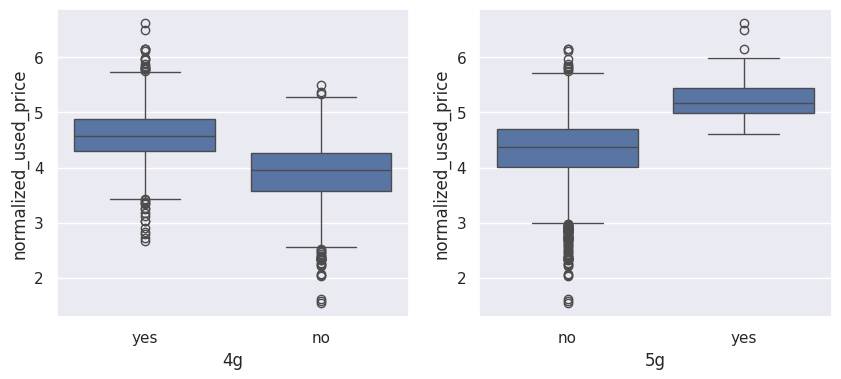

In [ ]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
sns.boxplot(data=df, x="4g", y="normalized_used_price")

plt.subplot(122)
sns.boxplot(data=df, x="5g", y="normalized_used_price")

plt.show()

The code you provided is designed to create a figure with two subplots, each containing a boxplot. These boxplots compare the prices of used phones and tablets based on their support for 4G and 5G networks. Here's a breakdown of what each part of the code does and why it's used:

Breakdown of the Code

Figure Setup:
plt.figure(figsize=(10, 4)) creates a new figure window with a specified size (10 inches wide by 4 inches tall). This size helps ensure that the subplots are adequately spaced and clearly visible.

Creating Subplots:
plt.subplot(121) and plt.subplot(122) are used to define subplots within the figure. The 121 indicates the first subplot in a grid that has 1 row and 2 columns, and it's the first subplot in this grid. The 122 is similarly the second subplot in the same grid.

Generating Boxplots:
sns.boxplot(data=df, x="4g", y="normalized_used_price") creates a boxplot for the normalized used prices based on whether the devices support 4G.
sns.boxplot(data=df, x="5g", y="normalized_used_price") creates another boxplot for the normalized used prices based on whether the devices support 5G.

Display the Plots:
plt.show() is used to display the figure with the subplots.

Purpose and Importance

Visual Comparison: The use of boxplots allows for an effective visual comparison of price distributions between groups. Boxplots show the median, quartiles, and outliers, which helps in understanding the spread and central tendency of prices within each category (4G and 5G support).

Analyzing Price Impact: By comparing the prices of devices that support 4G and 5G, you can assess how much these features impact the resale value of phones and tablets. This is crucial for your project as it helps determine if newer technology (like 5G) commands a premium in the used market.

Strategic Insights: The insights gained from these plots can help ReCell in making data-driven decisions regarding which types of devices to stock, based on their market value and sales potential. For example, if 5G devices show a higher median price, it might be beneficial to stock more of these devices as they could yield higher returns.

Consumer Preferences: Understanding price variation in relation to network capabilities can also provide insights into consumer preferences, potentially guiding marketing and sales strategies to target specific customer segments.

This approach helps to leverage graphical analysis to inform strategic business decisions, which is a core aspect of your role as a data scientist in developing a dynamic pricing model for ReCell.

The boxplots you provided depict the distribution of normalized used prices for devices based on their 4G and 5G capabilities. Here's what the plots indicate in the context of your project:

Analysis of the Plots

4G Devices:
Devices that support 4G (yes) show a higher median price compared to those that do not support 4G (no).
The interquartile range (IQR, or the middle 50% of the data) for 4G-supporting devices is broader and higher than for devices without 4G, indicating that 4G devices generally maintain a higher resale value.

5G Devices:
There is a notable difference in median prices between devices that support 5G and those that do not. Devices with 5G capability (yes) exhibit a higher median price.

The IQR for 5G devices is not only higher but also narrower compared to non-5G devices, suggesting that prices for 5G devices are more consistent and tend to be higher.

Interpretation in Relation to Your Project

Price Influence of Network Technology:
Both plots reveal that devices with newer network technologies (4G and especially 5G) tend to have higher median prices. This aligns with consumer expectations that devices with more advanced features, such as faster network capabilities, are more valuable.
The presence of 5G in particular seems to have a significant positive impact on price, reflecting the market's valuation of the latest technology.

Strategic Implications for ReCell:

Inventory Management: ReCell may benefit from stocking more devices with 4G and 5G capabilities as these devices command higher prices and may attract consumers looking for modern features in used devices.

Pricing Strategy: The data supports a strategy where ReCell could implement a premium pricing model for devices equipped with 5G, and a moderately premium model for 4G devices relative to those without such capabilities.

Marketing Focus: Promoting the availability of high-speed network-capable devices can be a strong selling point. Highlighting the availability of 5G devices, in particular, might attract customers looking for future-proof technology at a lower cost than new devices.

Market Trends and Consumer Preferences:

The higher prices for 4G and 5G devices likely reflect a broader consumer preference for devices that offer better performance in terms of connectivity, which is critical in today’s mobile-first world.

These insights from the boxplots can help ReCell refine its approach to buying, pricing, and selling used devices, ensuring alignment with market demands and consumer trends.

## Data Preprocessing

### Missing Value Imputation

- We will impute the missing values in the data by the column medians grouped by `release_year` and `brand_name`.

In [ ]:
# let's create a copy of the data
df1 = df.copy()

In [ ]:
# checking for missing values
df1.isnull().sum() ## Complete the code to check missing values in all the columns

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

In [ ]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]

for col in cols_impute:
    df1[col] = df1[col].fillna(
        value=df1.groupby(['release_year', 'brand_name'])[col].transform("median")
    )   ## Complete the code to impute missing values in cols_impute with median by grouping the data on release year and brand name

# checking for missing values
df1.isnull().sum() ## Complete the code to check missing values after imputing the above columns

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

- We will impute the remaining missing values in the data by the column medians grouped by `brand_name`.

In [ ]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "battery",
    "weight",
]

for col in cols_impute:
    df1[col] = df1[col].fillna(
        value=df1.groupby(['brand_name'])[col].transform("median")
    ) ## Complete the code to impute the missing values in cols_impute with median by grouping the data on brand name

# checking for missing values
df1.isnull().sum() ## Complete the code to check missing values after imputing the above columns

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

- We will fill the remaining missing values in the `main_camera_mp` column by the column median.

In [ ]:
df1["main_camera_mp"] = df1["main_camera_mp"].fillna(df1["main_camera_mp"].median()) ## Complete the code to impute the data with median

# checking for missing values
df1.isnull().sum() ## Complete the code to check missing values after imputing the above columns

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

### Feature Engineering



- Let's create a new column `years_since_release` from the `release_year` column.
- We will consider the year of data collection, 2021, as the baseline.
- We will drop the `release_year` column.

In [ ]:
df1["years_since_release"] = 2021 - df1["release_year"]
df1.drop("release_year", axis=1, inplace=True)
df1["years_since_release"].describe()

count    3454.000000
mean        5.034742
std         2.298455
min         1.000000
25%         3.000000
50%         5.500000
75%         7.000000
max         8.000000
Name: years_since_release, dtype: float64

### Outlier Check



- Let's check for outliers in the data.

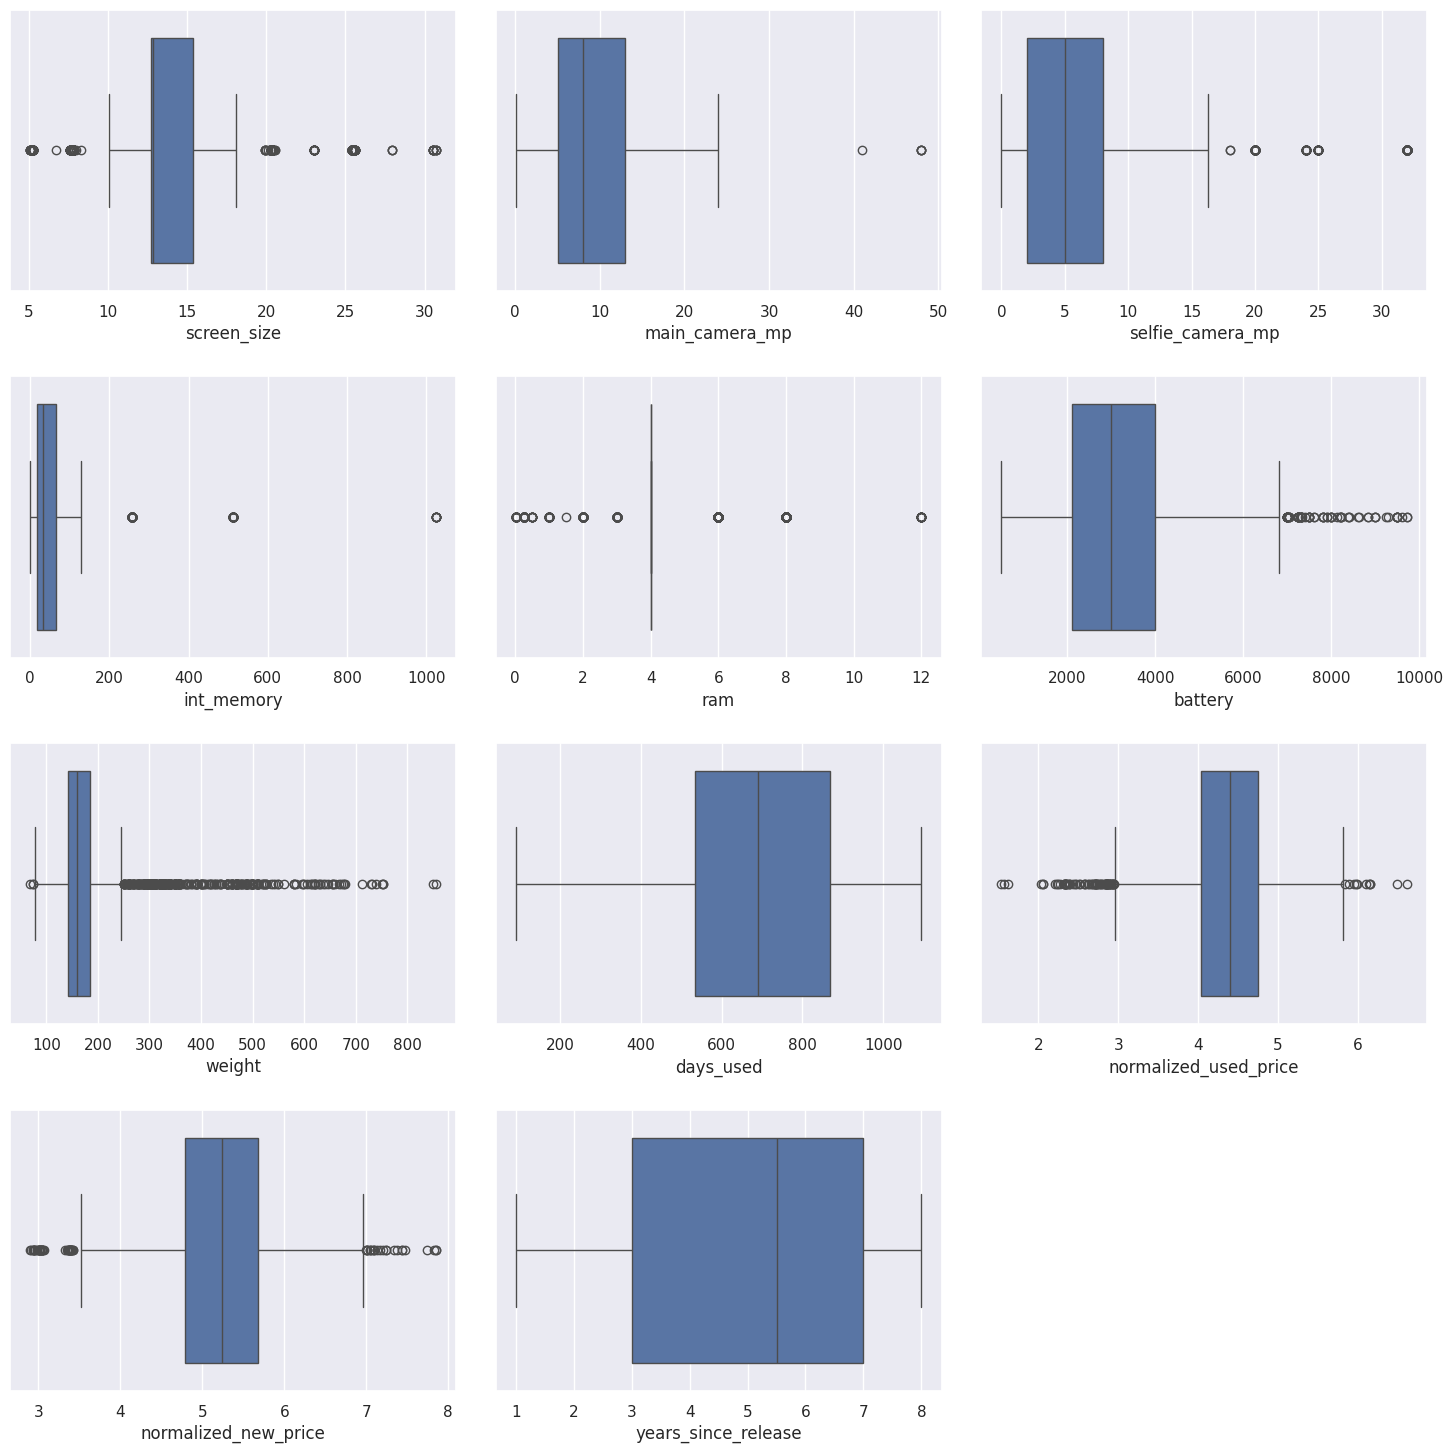

In [ ]:
# outlier detection using boxplot
num_cols = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df1, x=variable)
    plt.tight_layout(pad=2)

plt.show()

### Data Preparation for modeling

- We want to predict the normalized price of used devices
- Before we proceed to build a model, we'll have to encode categorical features
- We'll split the data into train and test to be able to evaluate the model that we build on the train data
- We will build a Linear Regression model using the train data and then check it's performance

In [ ]:
## Complete the code to define the dependent and independent variables
X = df1.drop('normalized_used_price', axis=1)  # all columns except the target
y = df1['normalized_used_price']  # target variable

print(X.head())
print()
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  days_used  \
0               5.0        64.0  3.0   3020.0   146.0        127   
1              16.0       128.0  8.0   4300.0   213.0        325   
2               8.0       128.0  8.0   4200.0   213.0        162   
3               8.0        64.0  6.0   7250.0   480.0        345   
4               8.0        64.0  3.0   5000.0   185.0        293   

   normalized_new_price  years_since_release  
0              4.715100                    1  
1              5.519018                    1  
2              5.884631                    1  
3              5.6

In [ ]:
# let's add the intercept to data
X = sm.add_constant(X)

In [ ]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)  ## Complete the code to create dummies for independent features

X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,...,False,False,False,False,False,False,False,False,True,False
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,...,False,False,False,False,False,False,False,False,True,True
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,...,False,False,False,False,False,False,False,False,True,True
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,...,False,False,False,False,False,False,False,False,True,True
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) ## Complete the code to split the data into train and test in specified ratio

In [ ]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


## Model Building - Linear Regression


In [ ]:
# Display data types of all columns
print(x_train.dtypes)


const                    float64
screen_size              float64
main_camera_mp           float64
selfie_camera_mp         float64
int_memory               float64
ram                      float64
battery                  float64
weight                   float64
days_used                  int64
normalized_new_price     float64
years_since_release        int64
brand_name_Alcatel          bool
brand_name_Apple            bool
brand_name_Asus             bool
brand_name_BlackBerry       bool
brand_name_Celkon           bool
brand_name_Coolpad          bool
brand_name_Gionee           bool
brand_name_Google           bool
brand_name_HTC              bool
brand_name_Honor            bool
brand_name_Huawei           bool
brand_name_Infinix          bool
brand_name_Karbonn          bool
brand_name_LG               bool
brand_name_Lava             bool
brand_name_Lenovo           bool
brand_name_Meizu            bool
brand_name_Micromax         bool
brand_name_Microsoft        bool
brand_name

In [ ]:
olsmodel1 = sm.OLS(y_train, x_train).fit() ## Complete the code to fit OLS model
print(olsmodel1.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

### Model Performance Check

**Let's check the performance of the model using different metrics.**

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.    
* We will create a function which will print out all the above metrics in one go.

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel1_train_perf = model_performance_regression(olsmodel1, x_train, y_train)
olsmodel1_train_perf

In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel1_test_perf = model_performance_regression('_______') ## Complete the code to check the performance on test data
olsmodel1_test_perf

## Checking Linear Regression Assumptions

We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR MULTICOLLINEARITY



- We will test for multicollinearity using VIF.

- **General Rule of thumb**:
    - If VIF is 1 then there is no correlation between the $k$th predictor and the remaining predictor variables.
    - If VIF exceeds 5 or is close to exceeding 5, we say there is moderate multicollinearity.
    - If VIF is 10 or exceeding 10, it shows signs of high multicollinearity.

Let's define a function to check VIF.

In [ ]:
#Let's define a function to check VIF.

def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [ ]:
checking_vif('_______')  ## Complete the code to check VIF on train data

### Removing Multicollinearity (if needed)



To remove multicollinearity

1. Drop every column one by one that has a VIF score greater than 5.
2. Look at the adjusted R-squared and RMSE of all these models.
3. Drop the variable that makes the least change in adjusted R-squared.
4. Check the VIF scores again.
5. Continue till you get all VIF scores under 5.

Let's define a function that will help us do this.

In [ ]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [ ]:
col_list = ['____'] ## Complete the code to specify the columns with high VIF

res = treating_multicollinearity('_____', y_train, col_list) ## Complete the code to check the effect on model performance after dropping specified columns from train data
res

In [ ]:
col_to_drop = '_____' ## Complete the code to specify the column to drop
x_train2 = '_____'.loc[:, ~'_____'.columns.str.startswith(col_to_drop)] ## Complete the code to specify the train data from which to drop the column specified
x_test2 = '_____'.loc[:, ~'_____'.columns.str.startswith(col_to_drop)] ## Complete the code to specify the test data from which to drop the column specified

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

### Dropping high p-value variables (if needed)

- We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
    - Repeat the above two steps till there are no columns with p-value > 0.05.

The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [ ]:
# initial list of columns
predictors = '_____'.copy()  ## Complete the code to check for p-values on the right dataset
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

In [ ]:
x_train3 = '____'[selected_features]  ## Complete the code to specify the train data from which to select the specified columns
x_test3 = '____'[selected_features]  ## Complete the code to specify the test data from which to select the specified columns

In [ ]:
olsmodel2 = sm.'_______' ## Complete the code fit OLS() on updated dataset (no multicollinearity and no insignificant predictors)
print(olsmodel2.summary())

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel2_train_perf = model_performance_regression('_______') ## Complete the code to check performance on train data
olsmodel2_train_perf

In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel2_test_perf = model_performance_regression('_______') ## Complete the code to check performance on test data
olsmodel2_test_perf

**Now we'll check the rest of the assumptions on *olsmod2*.**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR LINEARITY AND INDEPENDENCE



- We will test for linearity and independence by making a plot of fitted values vs residuals and checking for patterns.
- If there is no pattern, then we say the model is linear and residuals are independent.
- Otherwise, the model is showing signs of non-linearity and residuals are not independent.

In [ ]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmodel2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmodel2.resid  # residuals

df_pred.head()

In [ ]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

### TEST FOR NORMALITY

- We will test for normality by checking the distribution of residuals, by checking the Q-Q plot of residuals, and by using the Shapiro-Wilk test.
- If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
- If the p-value of the Shapiro-Wilk test is greater than 0.05, we can say the residuals are normally distributed.

In [ ]:
sns.histplot(data=df_pred, '_______') ## Complete the code to plot the distribution of residuals
plt.title("Normality of residuals")
plt.show()

In [ ]:
import pylab
import scipy.stats as stats

stats.probplot('_____', dist="norm", plot=pylab) ## Complete the code check Q-Q plot
plt.show()

In [ ]:
stats.shapiro('_______') ## Complete the code to apply the Shapiro-Wilks test

### TEST FOR HOMOSCEDASTICITY



- We will test for homoscedasticity by using the goldfeldquandt test.
- If we get a p-value greater than 0.05, we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], '_____') ## Complete the code with the right train data to apply the Goldfeldquandt test
lzip(name, test)

## Final Model Summary

In [ ]:
olsmodel_final = sm.'_______' ## Complete the code to fit the final model
print(olsmodel_final.summary())

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression('_______') ## Complete the code to check the performance on train data
olsmodel_final_train_perf

In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression('_______') ## Complete the code to check performance on test data
olsmodel_final_test_perf

##  Actionable Insights and Recommendations

-


---------